In [64]:
import json
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from collections import Counter
plt.rcParams["figure.figsize"] = (20, 10)

## Train

In [65]:
record_path = Path("simulation_result/multi/all_250_with_loss")
num_train_dirs = len(os.listdir(record_path / 'train'))
num_validate_dirs = len(os.listdir(record_path / 'validate'))
train_dirs = [record_path / 'train' / f'sim_{i}' for i in range(num_train_dirs)]
validate_dirs = [record_path / 'validate' / f'sim_{i}' for i in range(num_validate_dirs)]
config_path = record_path / 'config.json'

In [66]:
config = (json.loads(config_path.read_text()))
num_agent = sum([agent_config['number'] for agent_config in config['Agent']['RLAgent']])

In [67]:
import random
import json

markets, agents, rl_states, lengths, timesteps = [], [], [], [], []
for train_dir in train_dirs:
    security_path = train_dir / "TSMC.json"
    agent_path = train_dir / "agent.json"
    rl_path = train_dir / 'rl_agent.json'
    config_path = train_dir / 'config.json'
    market = json.loads(security_path.read_text())
    markets.append(market)
    agents.append(json.loads(agent_path.read_text()))
    rl_states.append(json.loads(rl_path.read_text()))
    lengths.append(len(market['price']))
    timesteps.append([i for i in range(len(market['price']))])

print(f"Average training length: {sum(lengths) / len(lengths)}")

Average training length: 2462.7


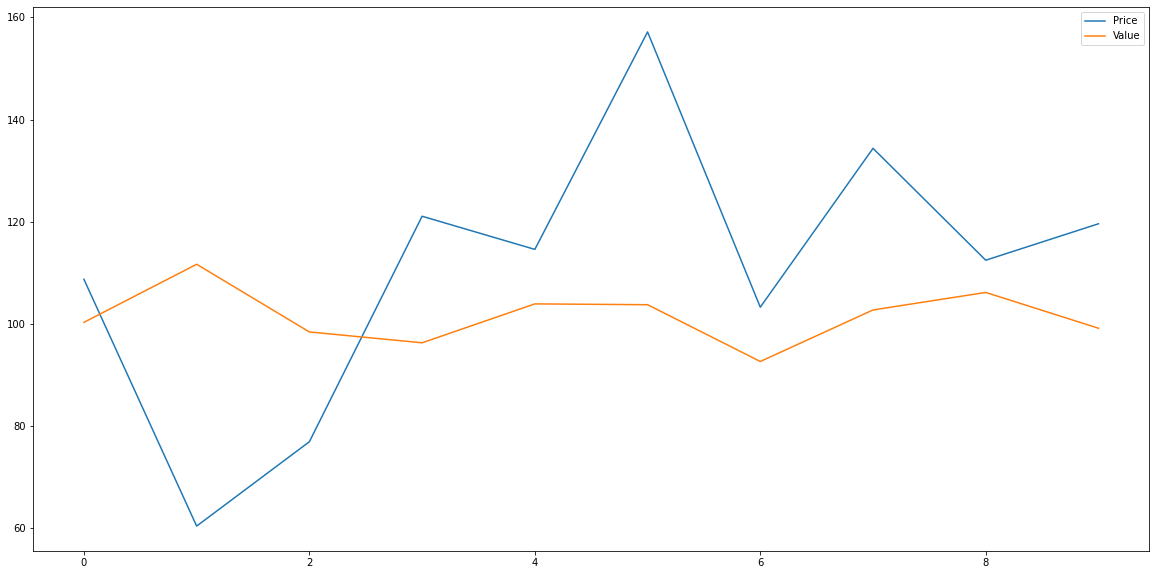

In [68]:
# Average price & value
avg_prices, avg_values = [], []
for market in markets:
    avg_prices.append(sum(market['price']) / len(market['price']))
    avg_values.append(sum(market['value']) / len(market['value']))

plt.plot(avg_prices, label = 'Price')
plt.plot(avg_values, label = 'Value')
plt.legend()

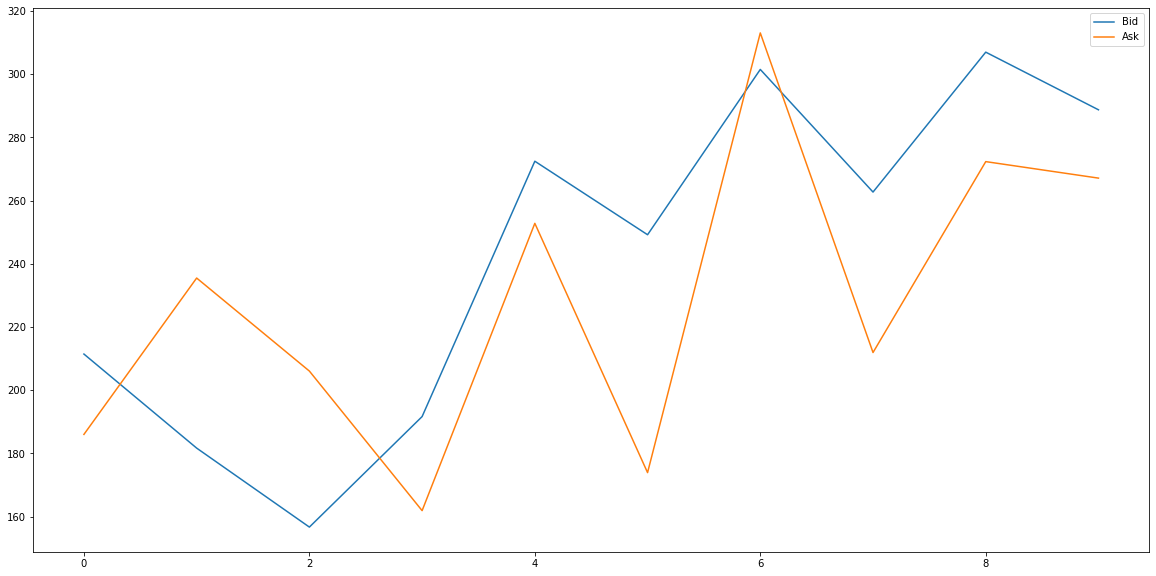

Average step per bid quantity per agent: 2.0635695545178625
Average step per ask quantity per agent: 2.192420832044814


In [69]:
avg_bids, avg_asks = [], []
for market in markets:
    avg_bids.append(sum(market['bid']) / len(market['bid']))
    avg_asks.append(sum(market['ask']) / len(market['ask']))

plt.plot(avg_bids, label = 'Bid')
plt.plot(avg_asks, label = 'Ask')
plt.legend()
plt.show()
print(f"Average step per bid quantity per agent: {1 / (sum([sum(market['bid']) / len(market['bid']) for market in markets]) / len(markets) / num_agent)}")
print(f"Average step per ask quantity per agent: {1 / (sum([sum(market['ask']) / len(market['ask']) for market in markets]) / len(markets) / num_agent)}")

In [ ]:
# # train
# for market in markets:
#     plt.plot(market['price'], label = 'price')
#     plt.plot(market['value'], label = 'value')
#     plt.legend()
#     plt.show()


In [ ]:
# for market in markets:
#     plt.plot(market['bid'], label = 'Bid quantity')
#     plt.plot(market['ask'], label = 'Ask quantity')
#     plt.legend()
#     plt.show()

In [44]:
# Distribution of total returns 
all_agent_returns = []
for rl_state in rl_states:
    for agent_state in rl_state.values():
        returns = (agent_state['states'][-1]['wealth'] - agent_state['states'][0]['wealth']) / agent_state['states'][0]['wealth']
        all_agent_returns.append(round(returns * 100))

In [57]:
num_pos_returns = len([ret for ret in all_agent_returns if ret > 0])
num_neg_returns = len([ret for ret in all_agent_returns if ret < 0])

Rate of positive returns: 0.9291433146517214
Rate of negtive returns: 0.07085668534827862


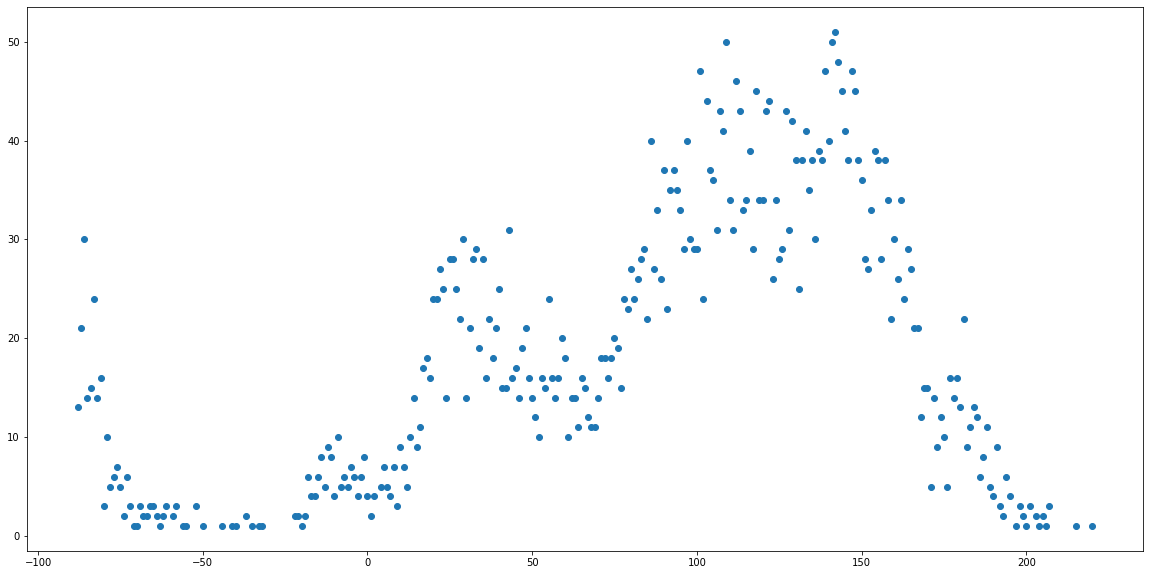

In [59]:
num_pos_returns = len([ret for ret in all_agent_returns if ret > 0])
num_neg_returns = len([ret for ret in all_agent_returns if ret < 0])
agent_returns_counter = Counter(all_agent_returns)
returns_x = sorted(agent_returns_counter.keys())
returns_y = [agent_returns_counter[x] for x in returns_x]
plt.scatter(returns_x, returns_y)
print(f"Rate of positive returns: {num_pos_returns / (num_pos_returns + num_neg_returns)}")
print(f"Rate of negtive returns: {num_neg_returns / (num_pos_returns + num_neg_returns)}")

In [60]:
# Distribution of returns by agent
agent_ids = rl_states[0].keys()
agent_returns = {agent_id: [] for agent_id in agent_ids}

for rl_state in rl_states:
    for agent_id, agent_state in rl_state.items():
        returns = (agent_state['states'][-1]['wealth'] - agent_state['states'][0]['wealth']) / agent_state['states'][0]['wealth']
        agent_returns[agent_id].append(round(returns * 100, 2))

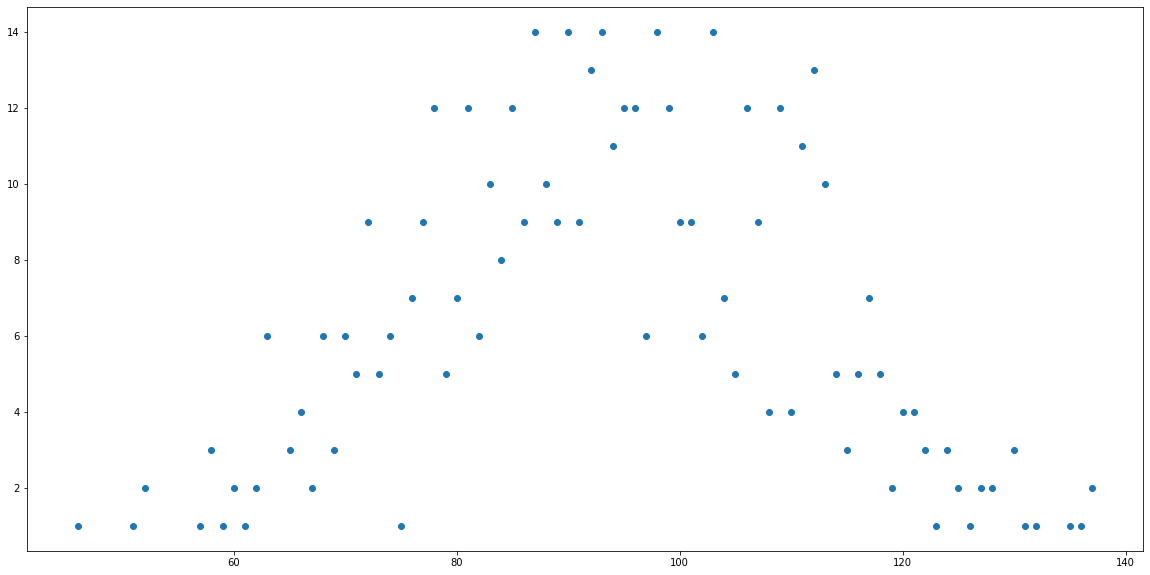

In [12]:
avg_agent_returns = [round(sum(agent_return) / len(agent_return)) for agent_return in agent_returns.values()]
agent_returns_counter = Counter(avg_agent_returns)
returns_x = sorted(agent_returns_counter.keys())
returns_y = [agent_returns_counter[x] for x in returns_x]
plt.scatter(returns_x, returns_y)

Postive progress: 0.588
Negative progress: 0.412


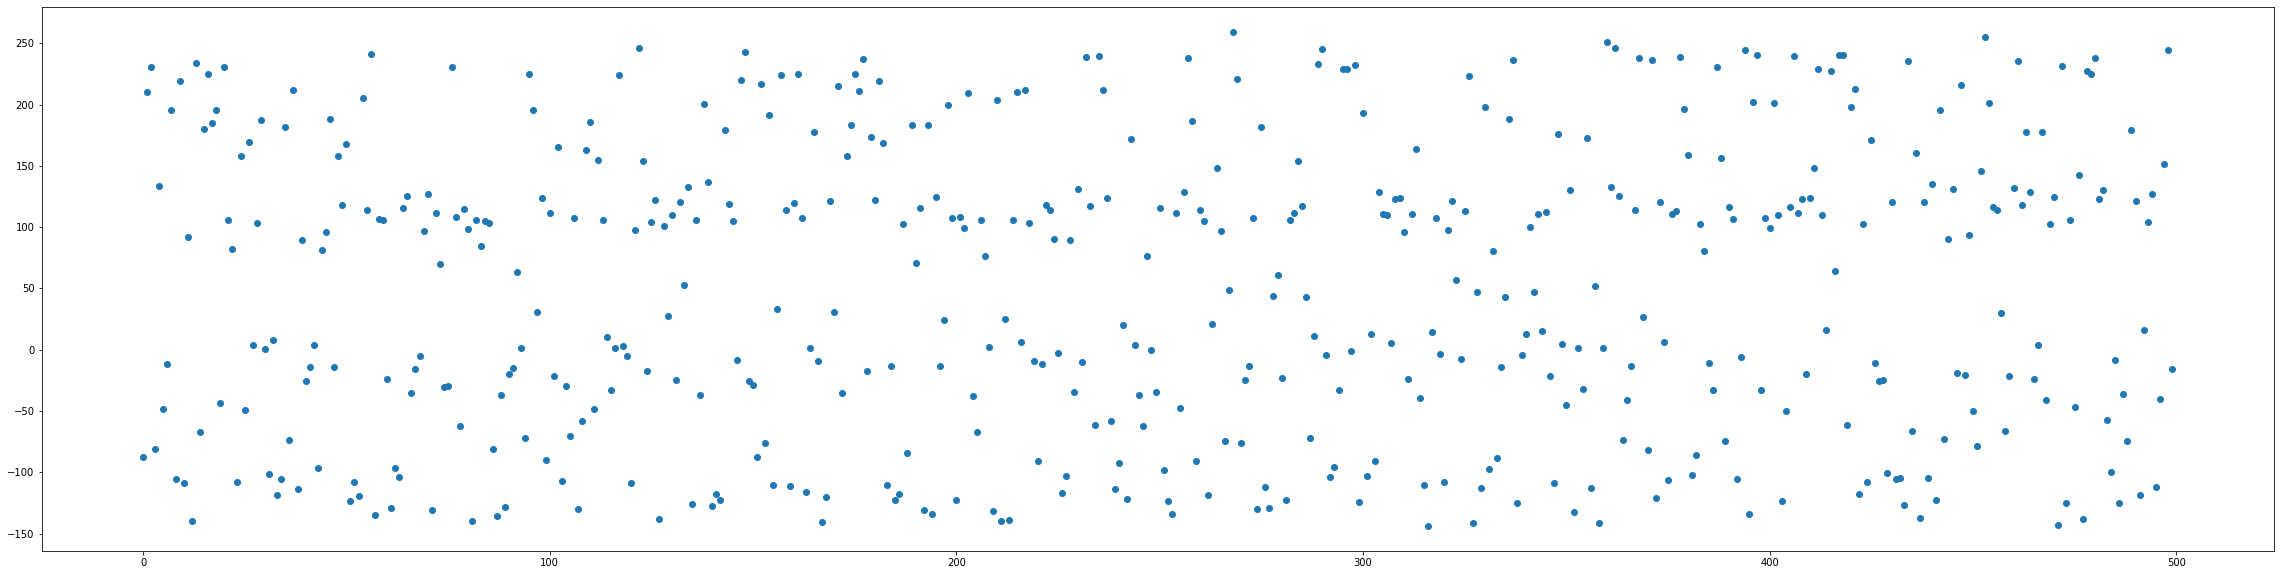

In [22]:
plt.figure(figsize=(40, 10))
returns_progress = [returns[-1] - returns[0] for returns in agent_returns.values()]
plt.scatter(list(range(len(returns_progress))), returns_progress)
num_pos_progress = len([progress for progress in returns_progress if progress > 0])
num_neg_progress = len([progress for progress in returns_progress if progress < 0])
print(f"Postive progress: {num_pos_progress / len(returns_progress)}")
print(f"Negative progress: {num_neg_progress / len(returns_progress)}")

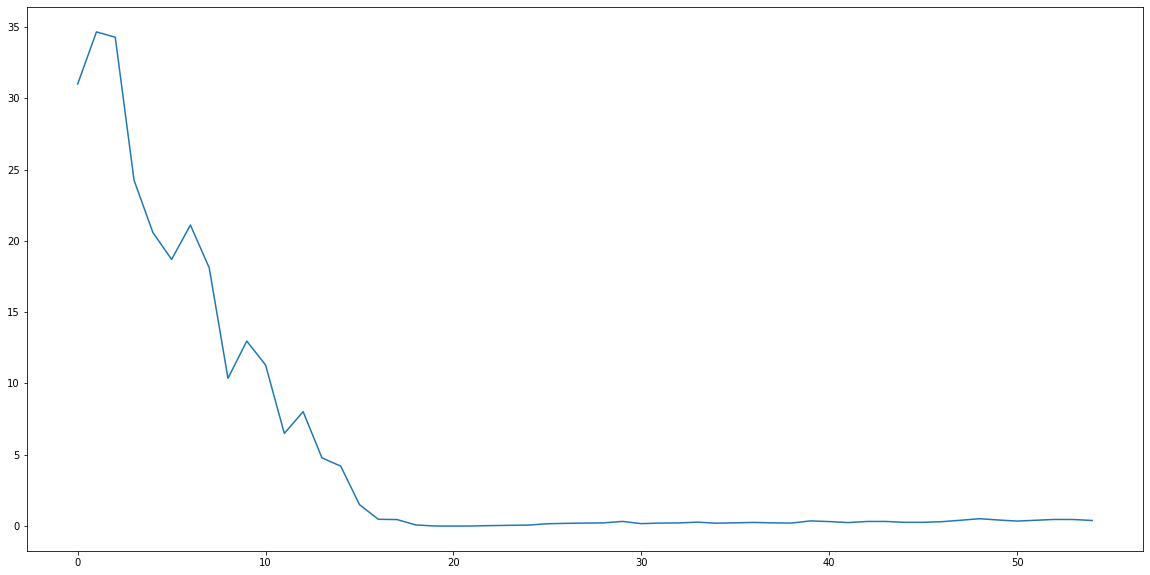

In [85]:
plt.plot(rl_states[5]['ppo_tr_250_0']['value_loss'])

### Validate

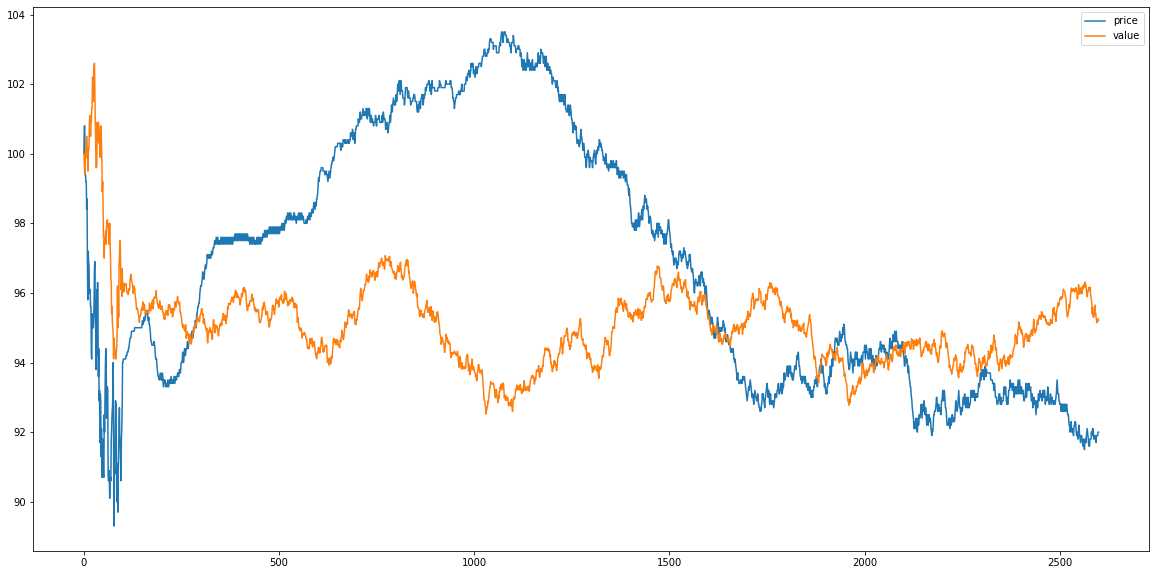

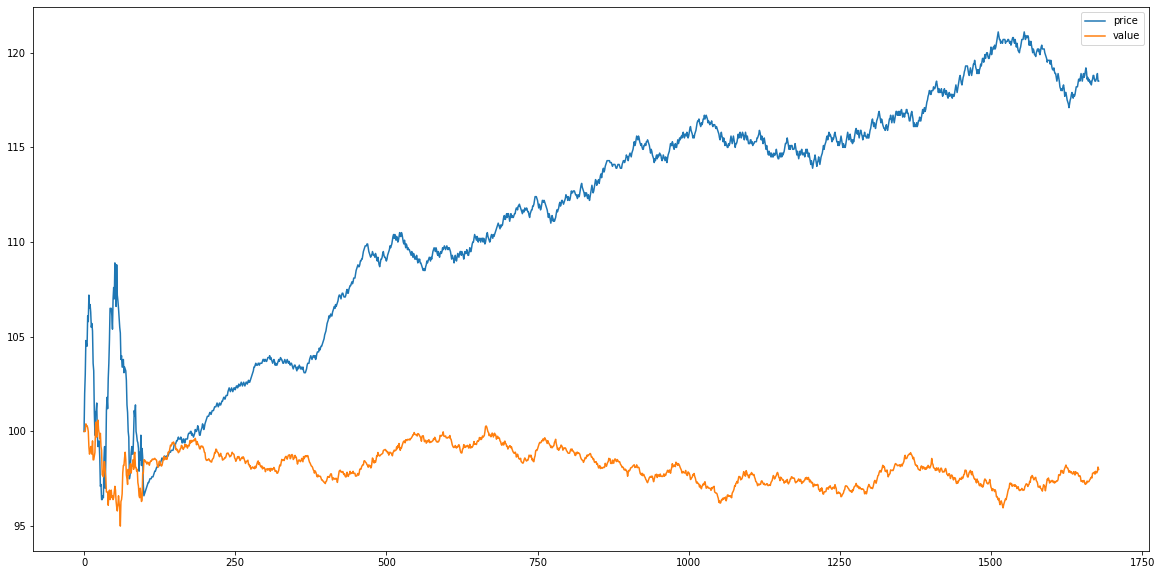

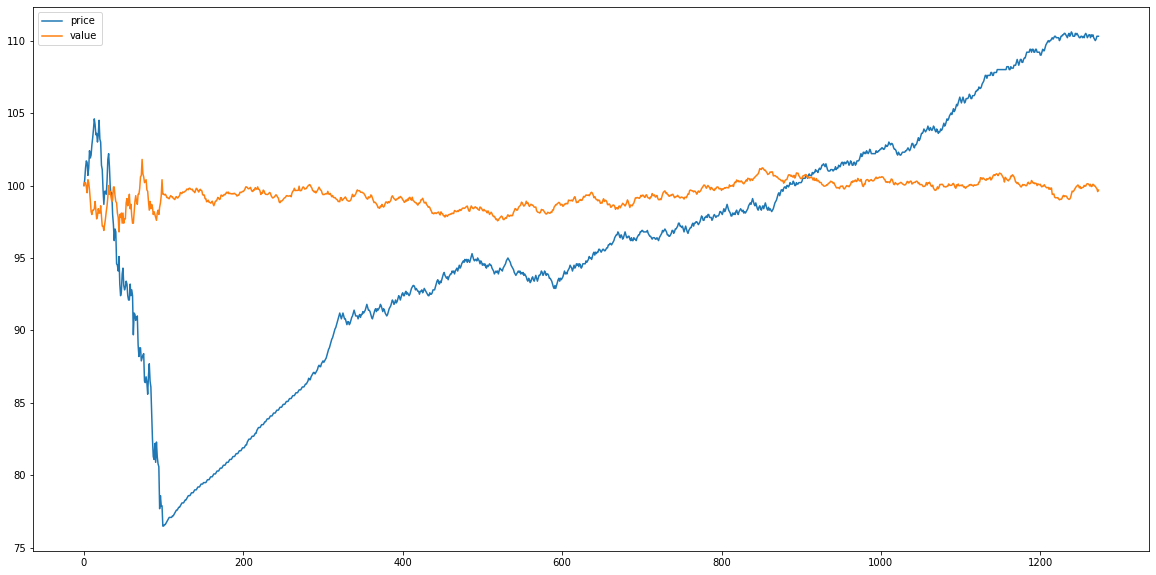

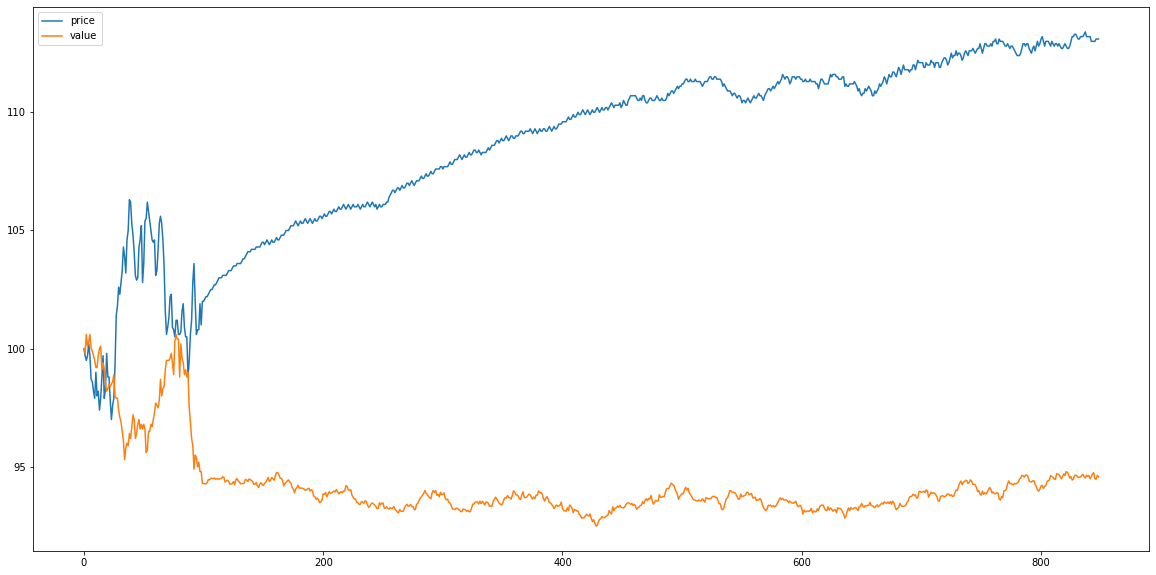

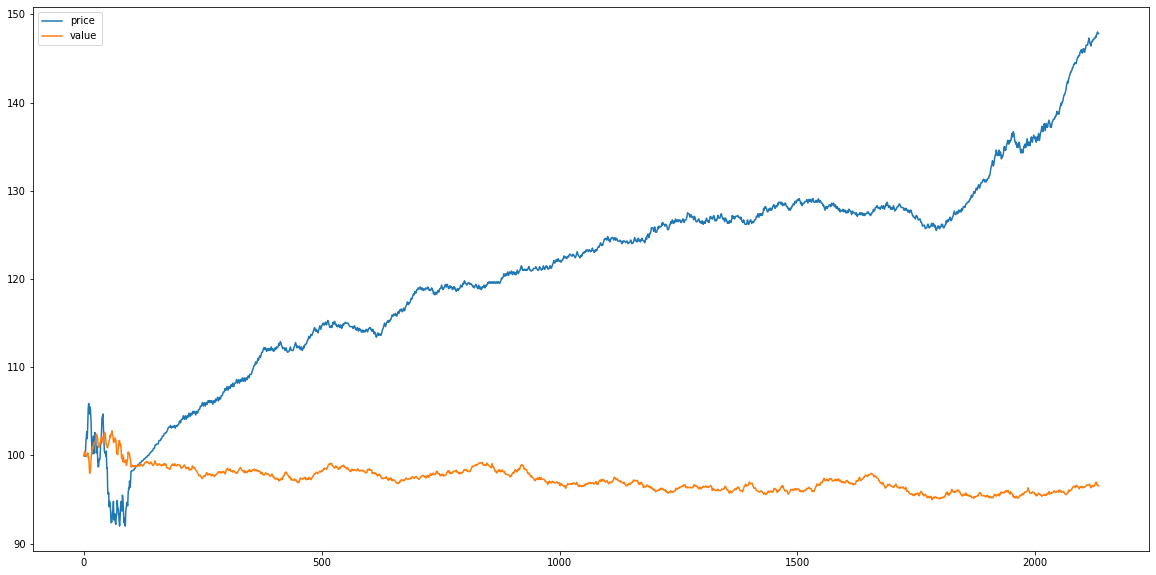

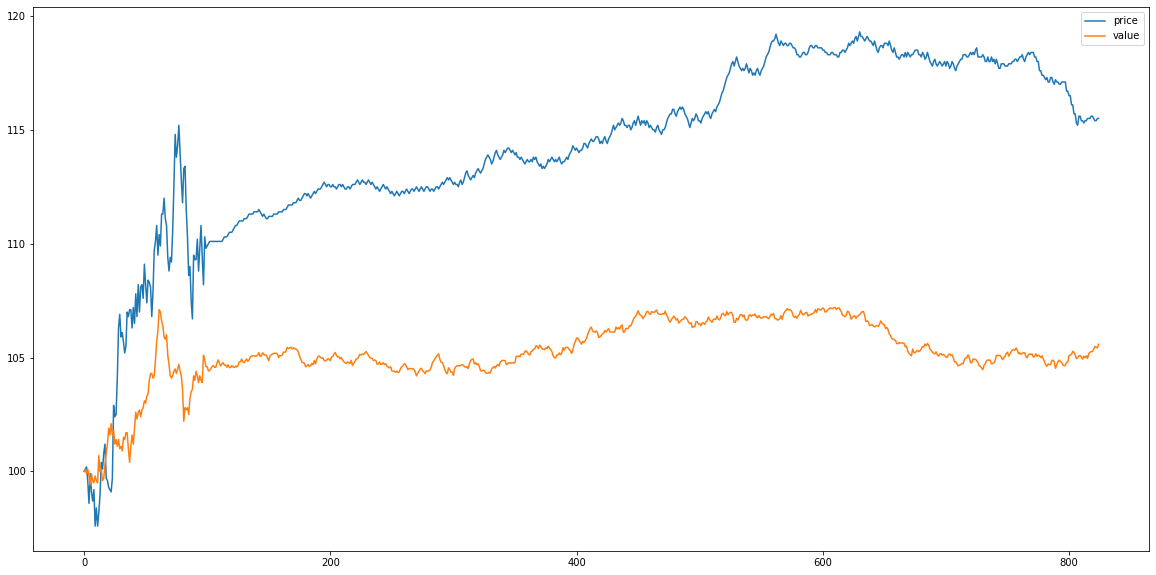

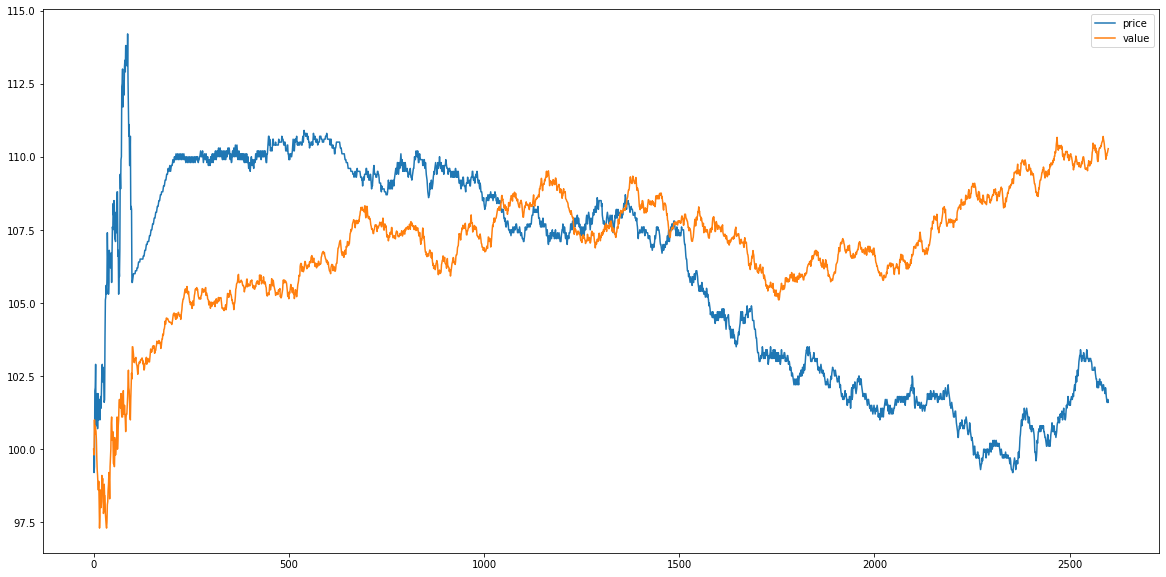

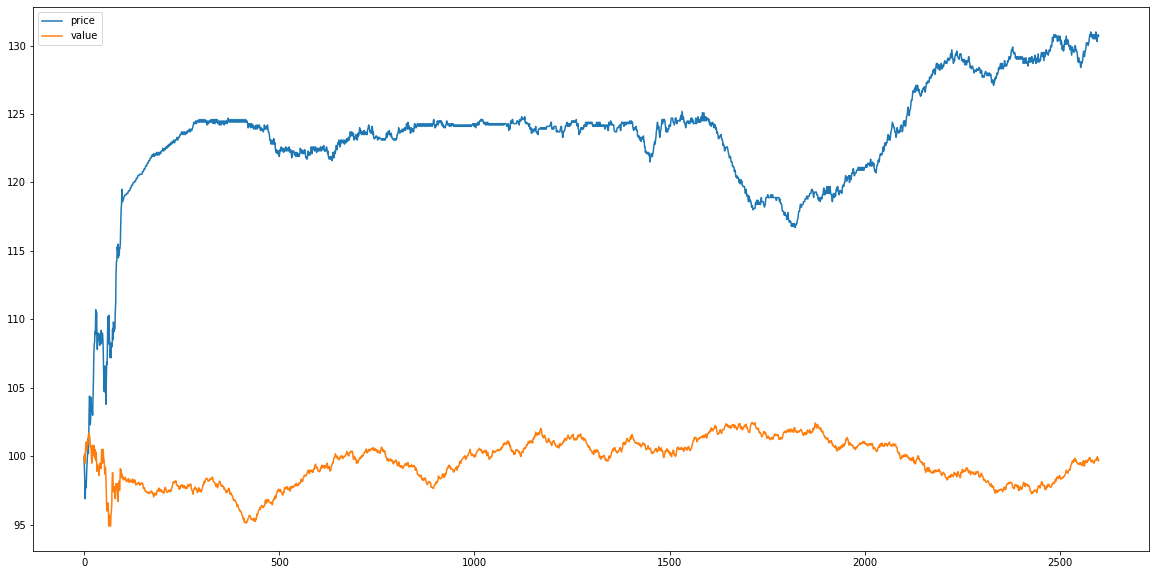

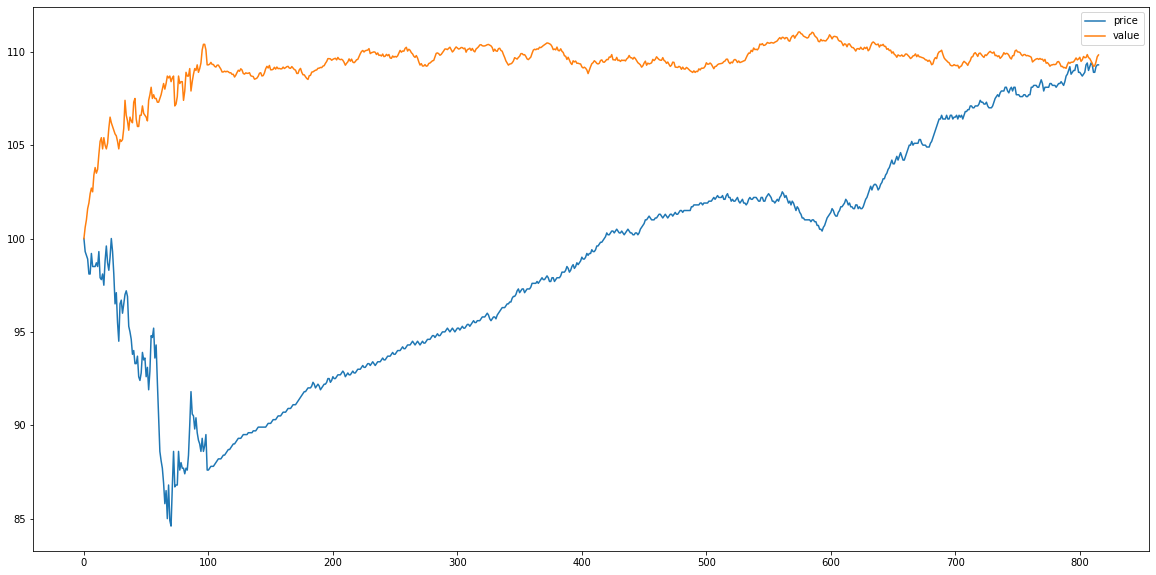

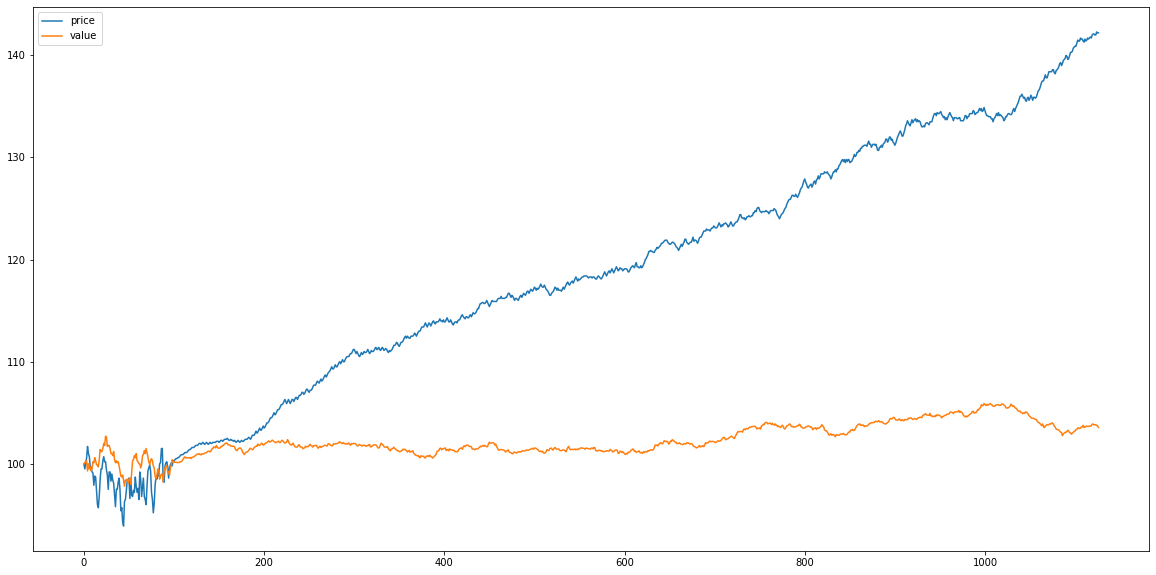

In [198]:
# validate
for validate_dir in validate_dirs:
    security_path = validate_dir / "TSMC.json"
    agent_path = validate_dir / "agent.json"
    market = json.loads(security_path.read_text())
    plt.plot(market['price'], label = 'price')
    plt.plot(market['value'], label = 'value')
    plt.legend()
    plt.show()


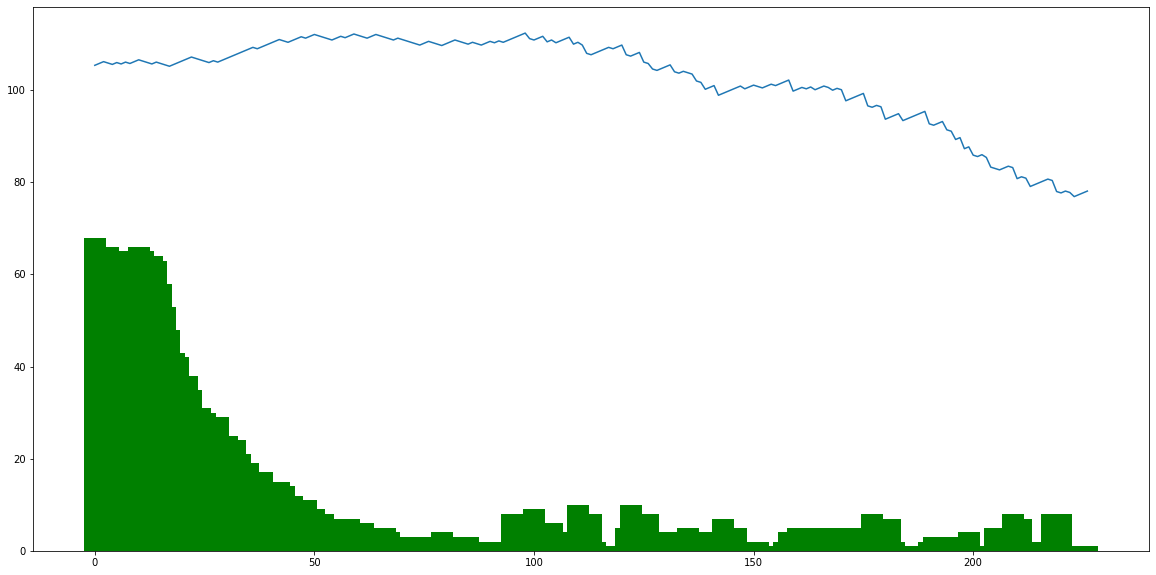

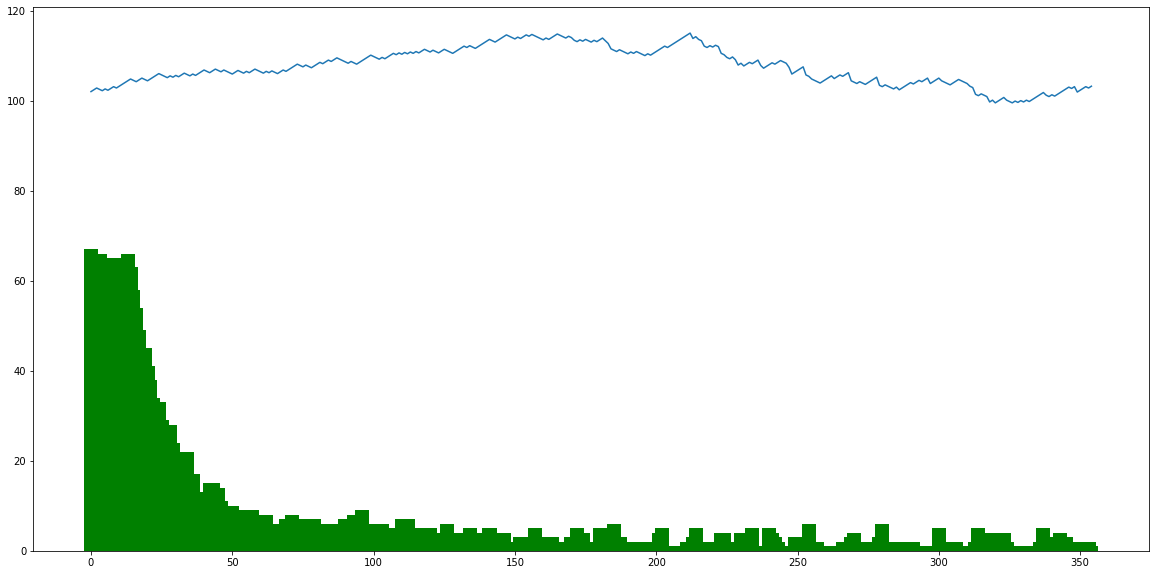

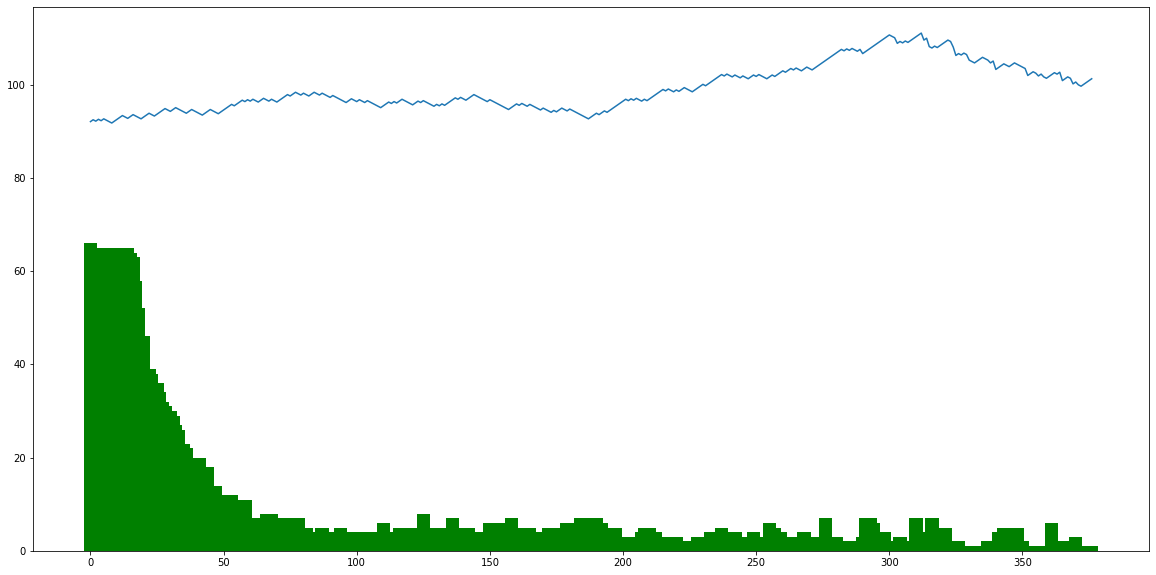

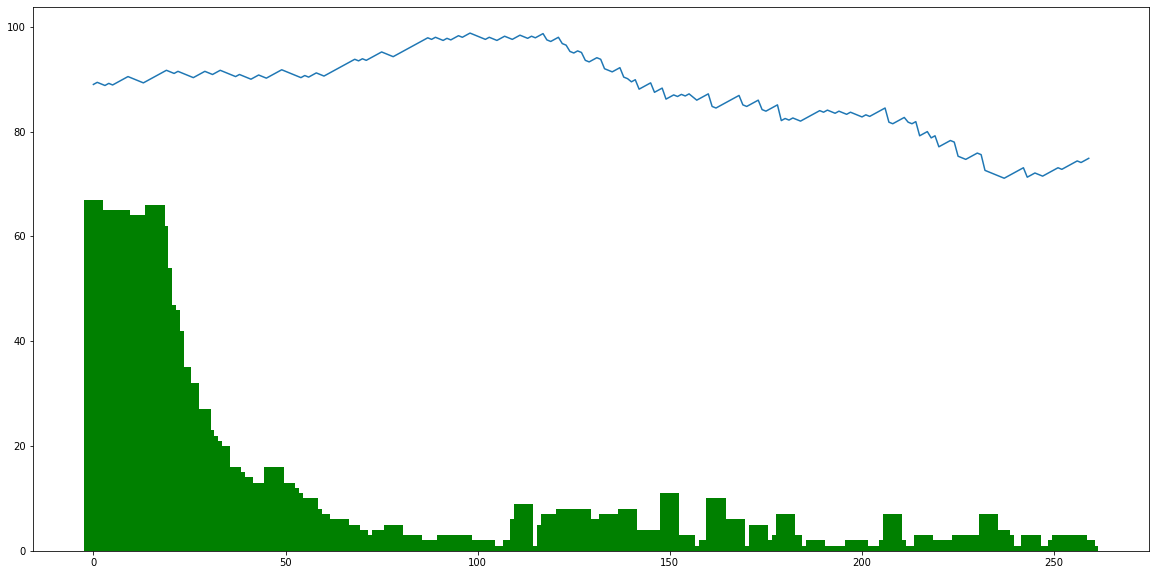

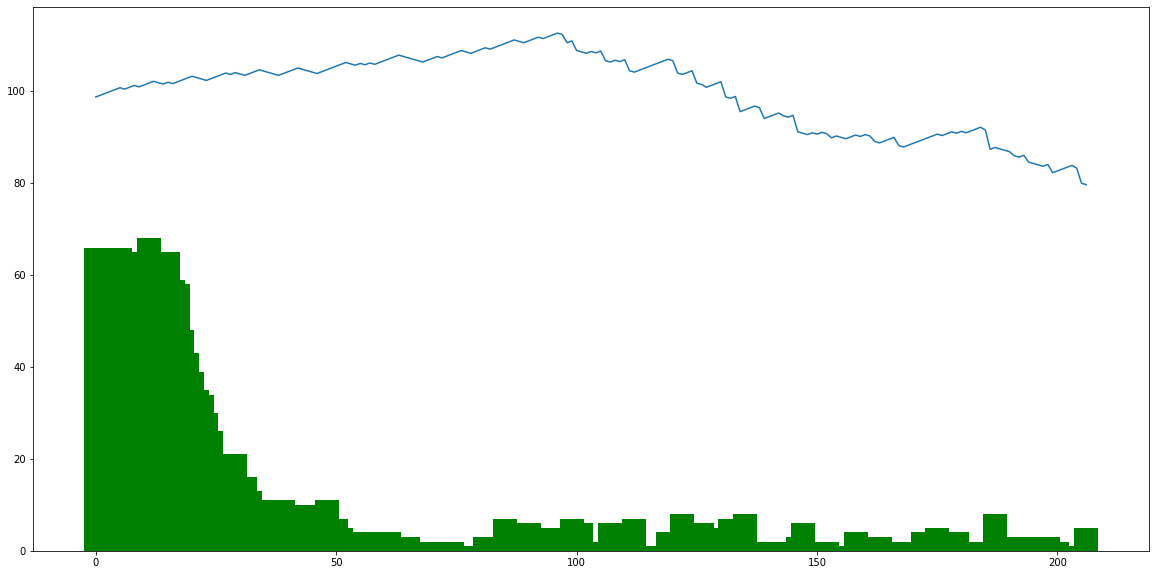

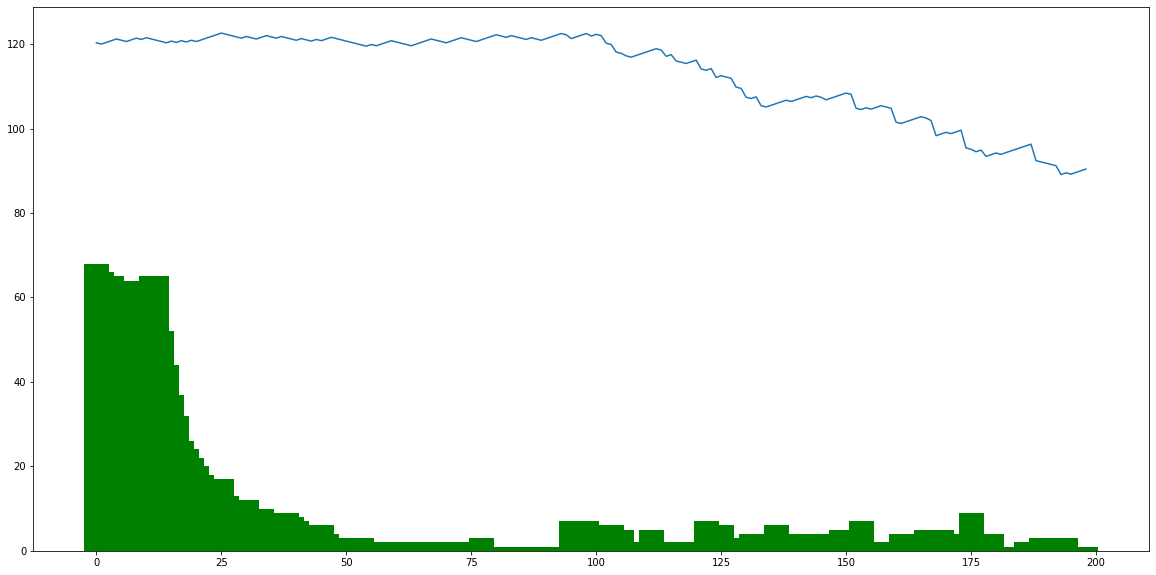

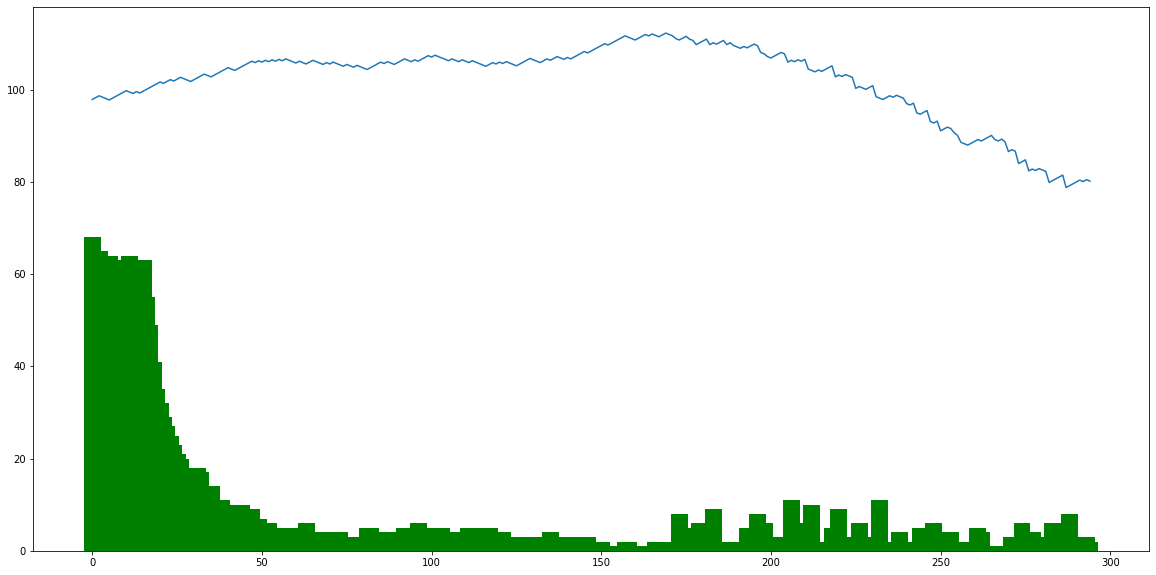

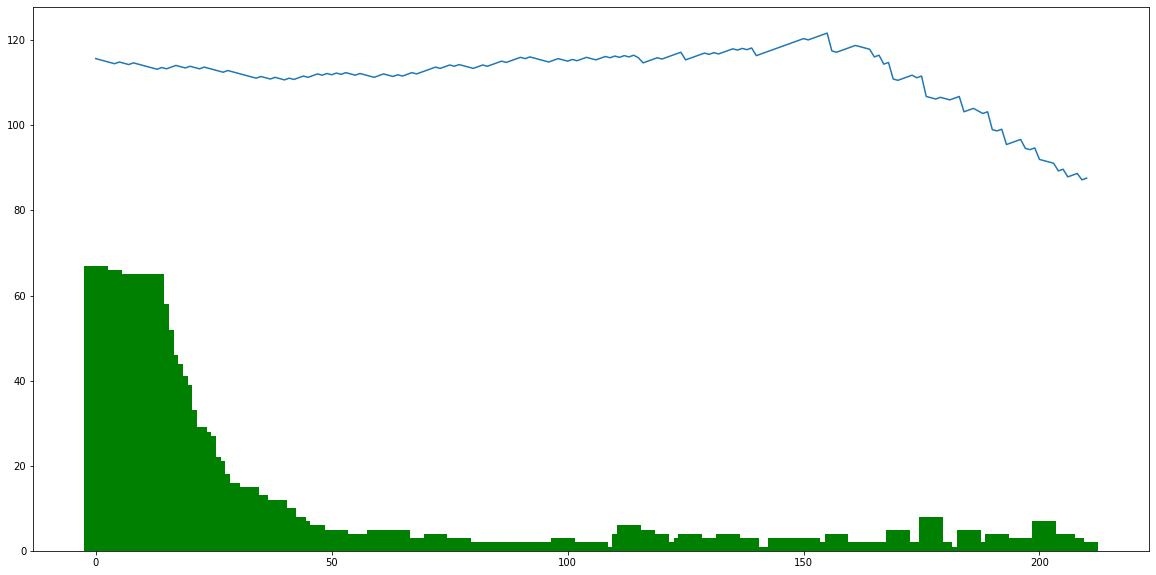

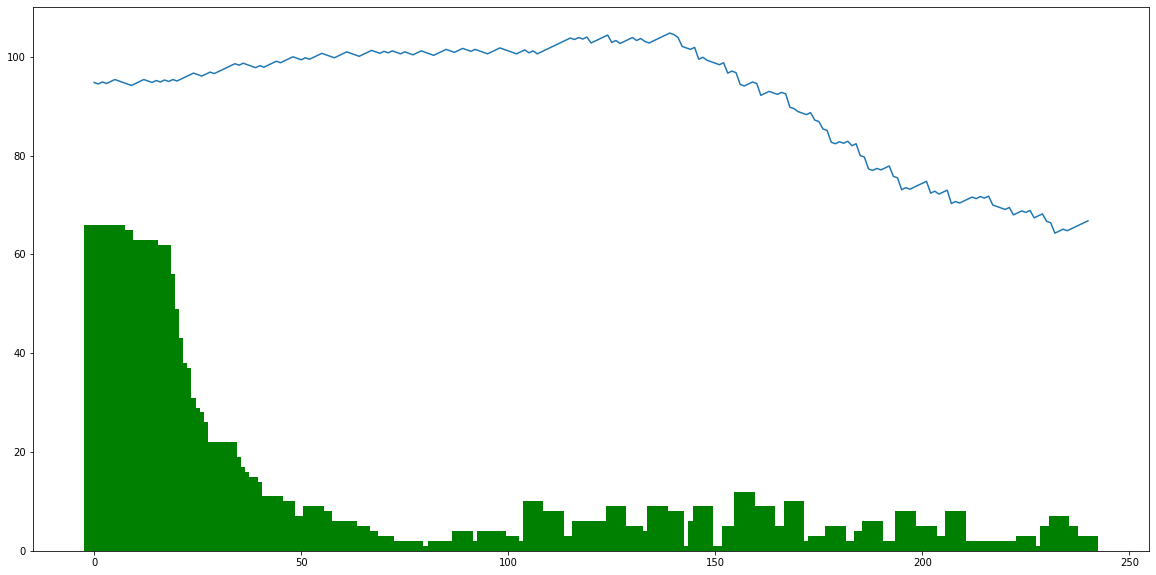

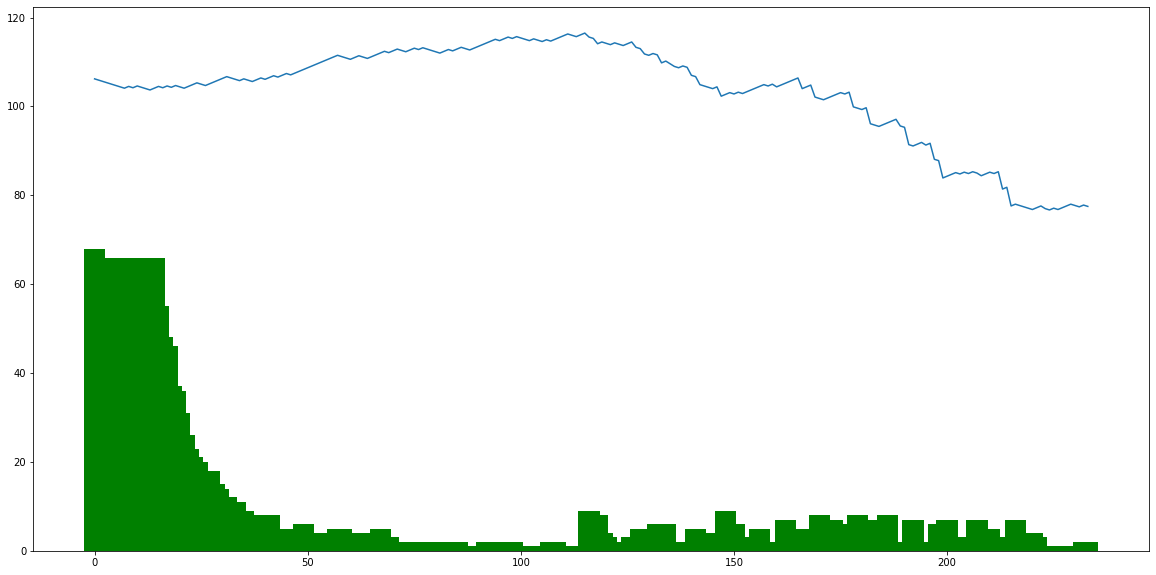

In [8]:
# validate
for validate_dir in validate_dirs:
    validate_dir = result_dir / 'validate' / validate_dir
    security_path = validate_dir / "TSMC.json"
    agent_path = validate_dir / "agent.json"
    market = json.loads(security_path.read_text())
    plt.plot(market['price'][100:])
    plt.bar([i for i in range(len(market['volume'][100:]))], market['volume'][100:], width = 5, color = 'g')
    plt.show()


## Agent

In [202]:
agent = pd.read_json(agent_path)
group_names = agent.columns
num_of_timesteps = len(agent[group_names[0]]['cash'])

2500

### Holdings

#### Initial state

In [57]:
num_agent = 0
total_cash, total_TSMC = 0, 0
zi_cash, zi_TSMC = 0, 0
for group_name in group_names:
    if 'dh' in group_name:
        continue
    elif 'zi' in group_name:
        zi_cash += sum(agent[group_name]['initial_cash_by_agent'])
        zi_TSMC += sum([i['TSMC'] for i in agent[group_name]['initial_security_by_agent']])
    else:
        total_cash += sum(agent[group_name]['initial_cash_by_agent'])
        total_TSMC += sum([i['TSMC'] for i in agent[group_name]['initial_security_by_agent']])
        num_agent += len(agent[group_name]['initial_cash_by_agent'])

print(f"Number of agents: {num_agent}")
print(f"Total TSMC: {total_TSMC} Total cash: {total_cash}")
print(f"Average TSMC: {total_TSMC // num_agent} Average cash: {total_cash // num_agent}")
print(f"ZI TSMC: {zi_TSMC} ZI cash: {zi_cash}")
if 'dh_1' in group_names:
    print(f"Dahoo cash: {agent['dh_1']['initial_cash_by_agent'][0]}")

Number of agents: 1000
Total TSMC: 61311 Total cash: 618009590
Average TSMC: 61 Average cash: 618009
ZI TSMC: 0 ZI cash: 0


#### Wealth

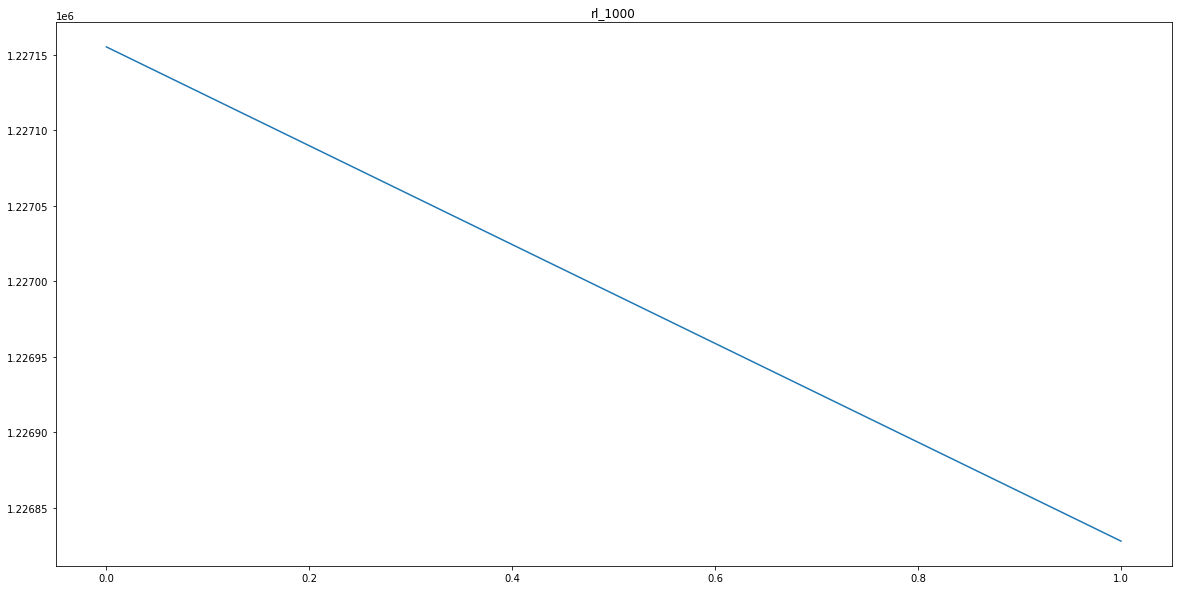

In [13]:
# for agent_type in agent.columns:
for group_name in agent.columns:
    plt.figure(figsize=(20, 10))
    plt.plot(agent[group_name]['wealth'])
    plt.title(group_name)
    plt.show()

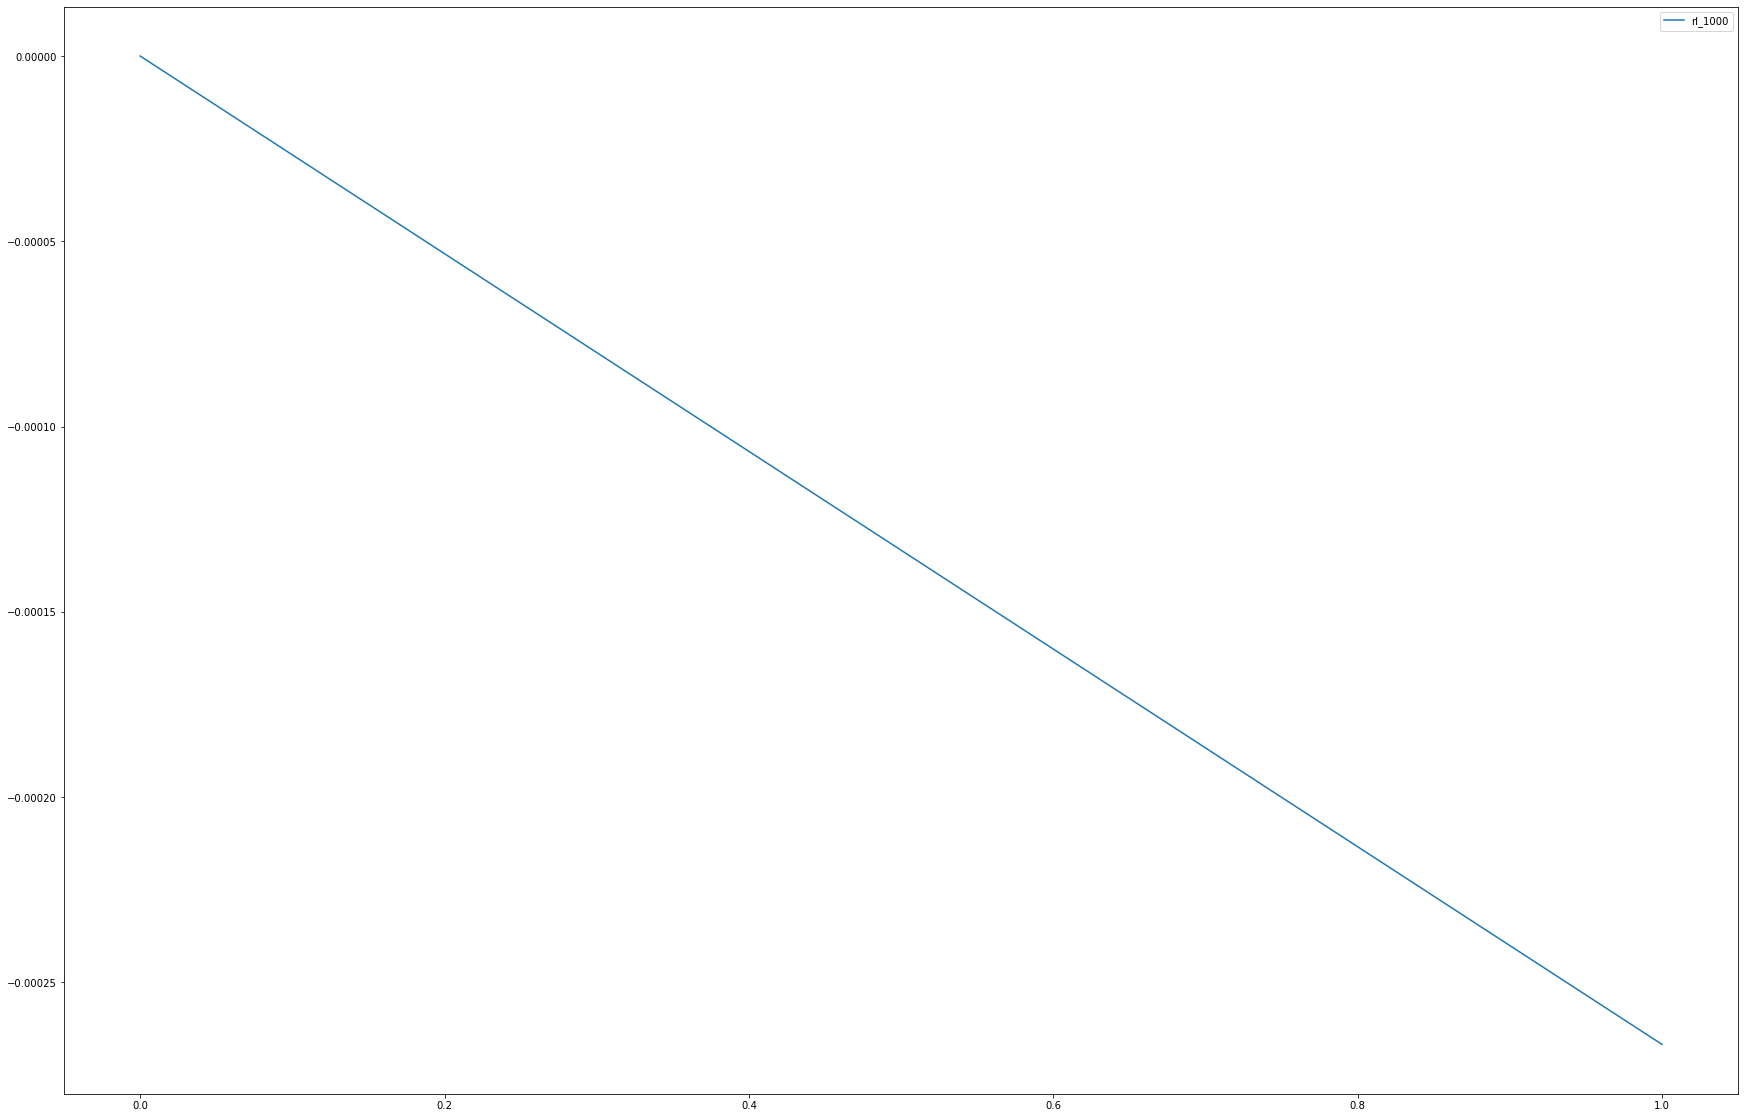

In [14]:
# normalize 
wealth = np.array([agent[group_name]['wealth'] for group_name in group_names])
std_wealth = (wealth - wealth[:, 0].reshape(-1, 1)) / wealth[:, 0].reshape(-1, 1)

plt.figure(figsize=(30, 20))
for i, group_name in enumerate(agent.columns):
    plt.plot(std_wealth[i], label = group_names[i])
plt.legend()

#### Cash

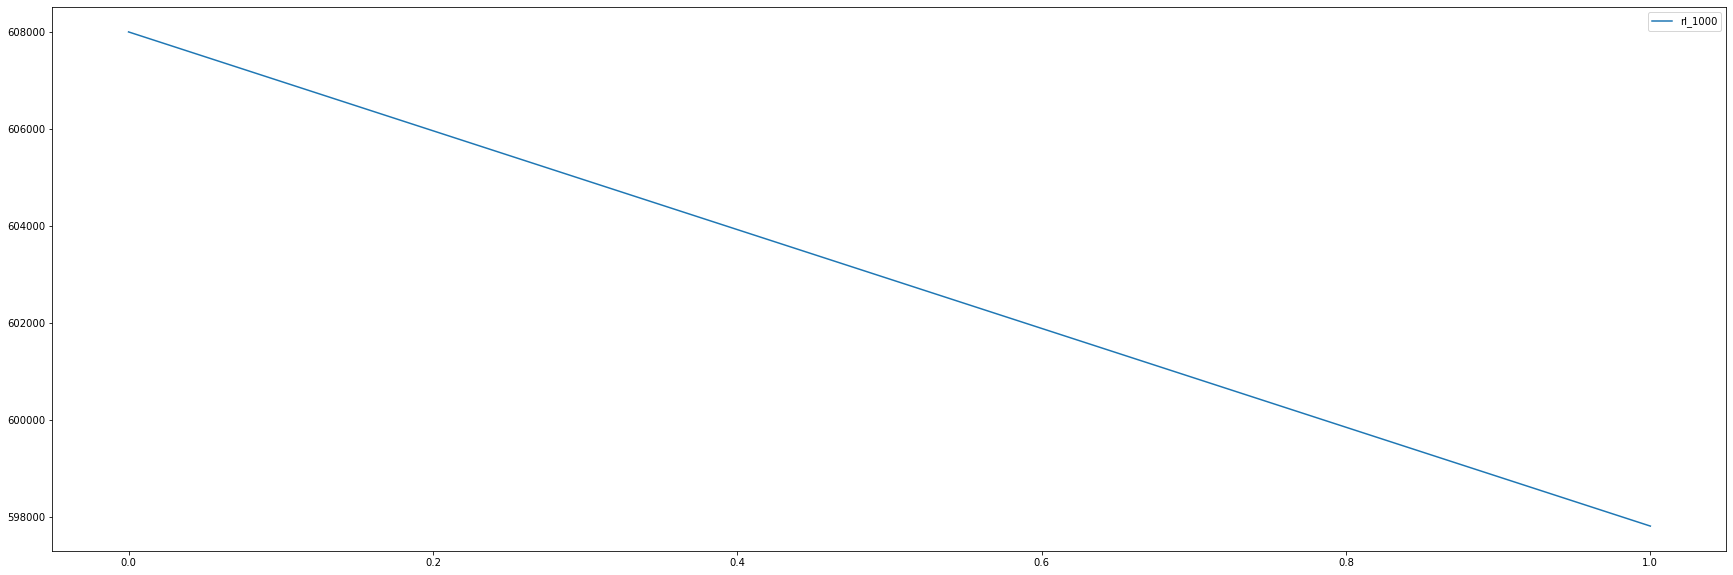

In [15]:
plt.figure(figsize=(30, 10))
for i, group_name in enumerate(agent.columns):
    plt.plot(agent[group_name]['cash'], label = group_names[i])
plt.legend()
plt.show()

#### Security

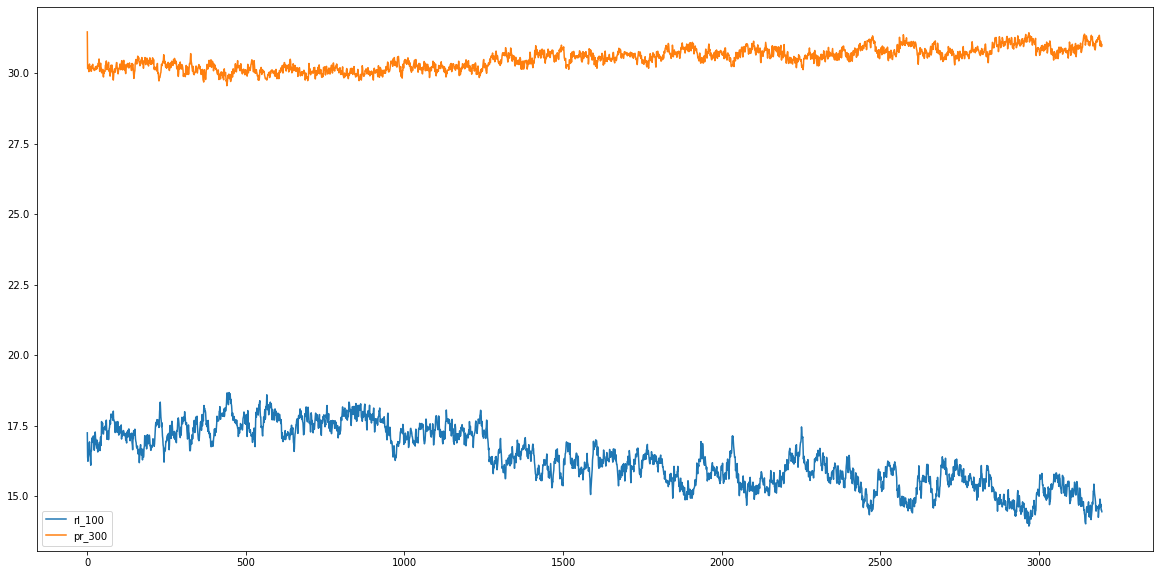

In [21]:
plt.figure(figsize=(20, 10))
for i, group_name in enumerate(agent.columns):
    plt.plot(agent[group_name]['TSMC'], label = group_names[i])
plt.legend()
plt.show()

#### Portfolio

In [23]:
plt.figure(figsize=(20, 10))

close_price = tsmc['close'].to_numpy()
for group_name in group_names:
    security_value = close_price * np.array(agent[group_name]['TSMC']) * 100
    security_propotion = security_value / (np.array(agent[group_name]['cash'])  + security_value)
    plt.plot(security_propotion)
    plt.title(group_name, size = 20)
    plt.show()

NameError: name 'tsmc' is not defined

<Figure size 1440x720 with 0 Axes>

In [ ]:
# baseline_return = pow(1.01, 100) / 2
# for group_name in group_names:
#     plt.figure(figsize=(20, 10))
#     plt.axhline(y = baseline_return)
#     plt.scatter(agent[group_name]['initial_wealth_by_agent'], np.array(agent[group_name]['returns_by_agent']))
#     plt.xlabel('Initial wealth')
#     plt.ylabel('Return')
#     plt.title(f"{group_name}")
#     plt.show()

#### Average cost

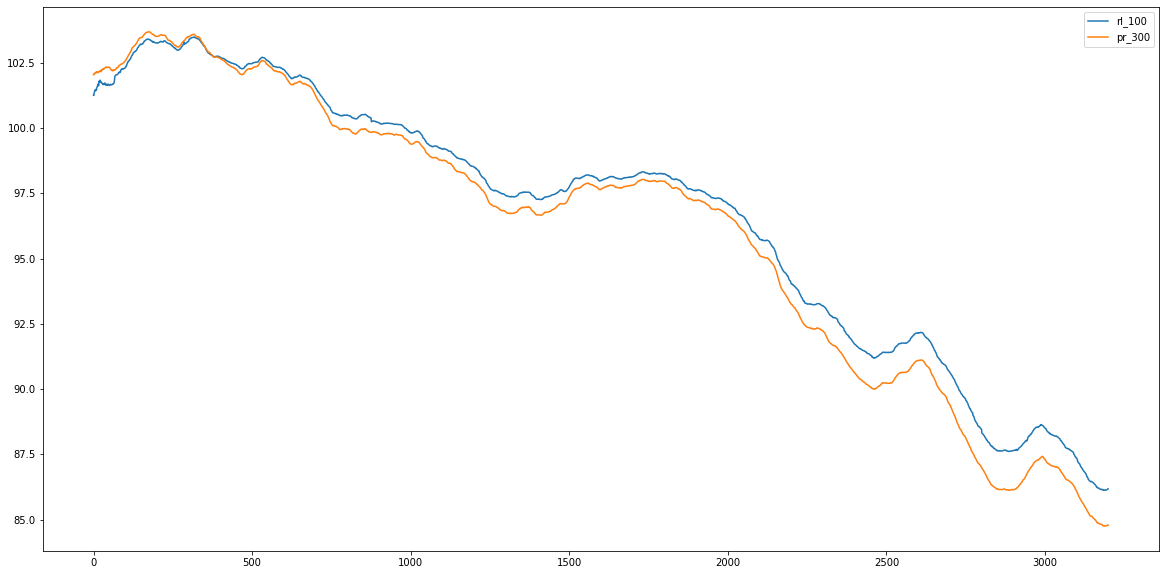

In [24]:
plt.figure(figsize=(20, 10))
for i, group_name in enumerate(agent.columns):
    plt.plot(agent[group_name]['average_cost'], label = group_names[i])
plt.legend()

### Orders

#### Number

#### Each group

In [25]:
from collections import defaultdict

t = list(group_names)
for group_name in group_names:
    if 'zi' in group_name:
        continue
    bids_timestep, bids_price, bids_volume, asks_timestep, asks_price, asks_volume = [], [], [], [], [], []
    bids_price_volume = defaultdict(float)
    asks_price_volume = defaultdict(float)
    
    for i in range(len(agent[group_name]['timestep_bid'])):
        for price, volume in agent[group_name]['timestep_bid'][i].items():
            bids_timestep.append(i)
            bids_price.append(float(price))
            bids_volume.append(volume)
            bids_price_volume[float(price)] += volume
        for price, volume in agent[group_name]['timestep_ask'][i].items():
            asks_timestep.append(i)
            asks_price.append(float(price))
            asks_volume.append(volume)
            asks_price_volume[float(price)] += volume
    
    bids_size = [ 400*(volume - min(bids_volume)) / max(bids_volume) - min(bids_volume) for volume in bids_volume]
    asks_size = [ 400*(volume - min(asks_volume)) / max(asks_volume) - min(asks_volume) for volume in asks_volume]
    plt.plot(tsmc['close'])
    plt.scatter(bids_timestep, bids_price, s = bids_size, c = 'r', marker = 6)
    plt.scatter(asks_timestep, asks_price, s = asks_size, c = 'g', marker = 7)
    plt.title(group_name)
    plt.show()
    plt.bar(list(bids_price_volume.keys()), list(bids_price_volume.values()), color = 'r')
    plt.bar(list(asks_price_volume.keys()), np.array(list(asks_price_volume.values())) * -1, color = 'g')
    plt.show()


NameError: name 'tsmc' is not defined

#### Propotion

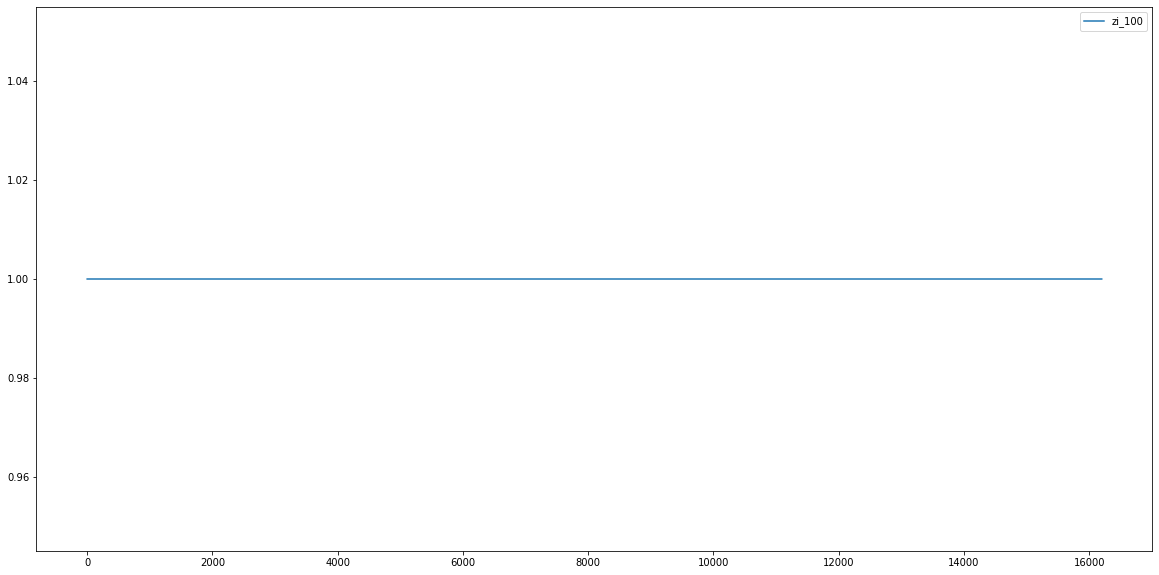

In [90]:
group_bids_volume = [agent.loc['group_bids_volume', group_name] for group_name in group_names]
group_bids_volume = np.array(group_bids_volume).T
group_bids_volume = group_bids_volume / group_bids_volume.sum(axis = 1).reshape(-1, 1)
for i in range(len(group_names)):
#     if group_names[i] == 'zi_1000':
#         continue
    plt.plot(group_bids_volume[:, i], label = group_names[i])
# plt.ylim(0, 0.1)
plt.legend()

In [ ]:
group_asks_volume = [agent.loc['group_asks_volume', group_name] for group_name in group_names]
group_asks_volume = np.array(group_asks_volume).T
group_asks_volume = group_asks_volume / group_asks_volume.sum(axis = 1).reshape(-1, 1)
for i in range(len(group_names)):
#     if group_names[i] == 'zi_1000':
#         continue
    plt.plot(-1 * group_asks_volume[:, i], label = group_names[i])

# plt.ylim(-0.3, 0.2)
plt.legend()

## RL Agent

In [5]:
import random

markets, agents, rl_states, lengths, timesteps = [], [], [], [], []
for _dir in validate_dirs:
    record_dir = result_dir / 'validate' / _dir
    security_path = record_dir / "TSMC.json"
    agent_path = record_dir / "agent.json"
    rl_path = record_dir / 'rl_agent.json'
    config_path = result_dir / 'config.json'
    market = json.loads(security_path.read_text())
    markets.append(market)
    agents.append(json.loads(agent_path.read_text()))
    rl_states.append(json.loads(rl_path.read_text()))
    lengths.append(len(market['price']))
    timesteps.append([i for i in range(len(market['price']))])

In [6]:
print(f"Average length: {sum(lengths) / len(lengths)}")

Average length: 1650.4


In [175]:
for timestep, action in enumerate(actions):
    if action[0] == 0:
        bid_x.append(timestep + 100)
        bid_y.append(action[1]*0.1)
        bid_colors.append('r')
        bid_sizes.append(base_size * action[2])
    elif action[0] == 1:
        ask_x.append(timestep + 100)
        ask_y.append(action[1]*0.1)
        ask_colors.append('g')
        ask_sizes.append(base_size * action[2])

ppo_tr_100_35


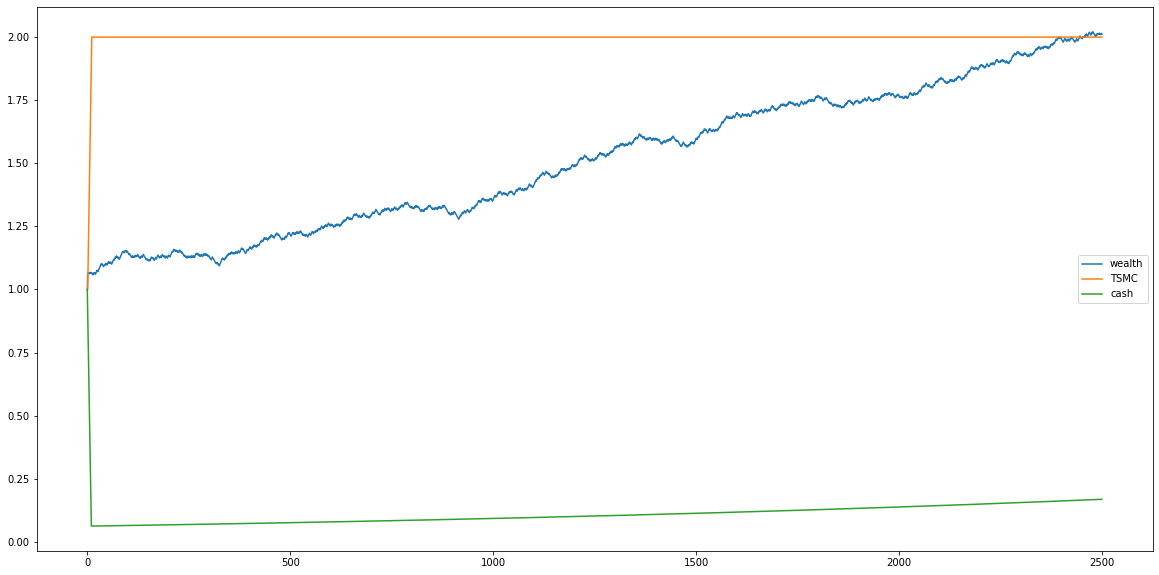

Bid rate: 0.9992, Ask rate: 0.0, Hold rate: 0.0008


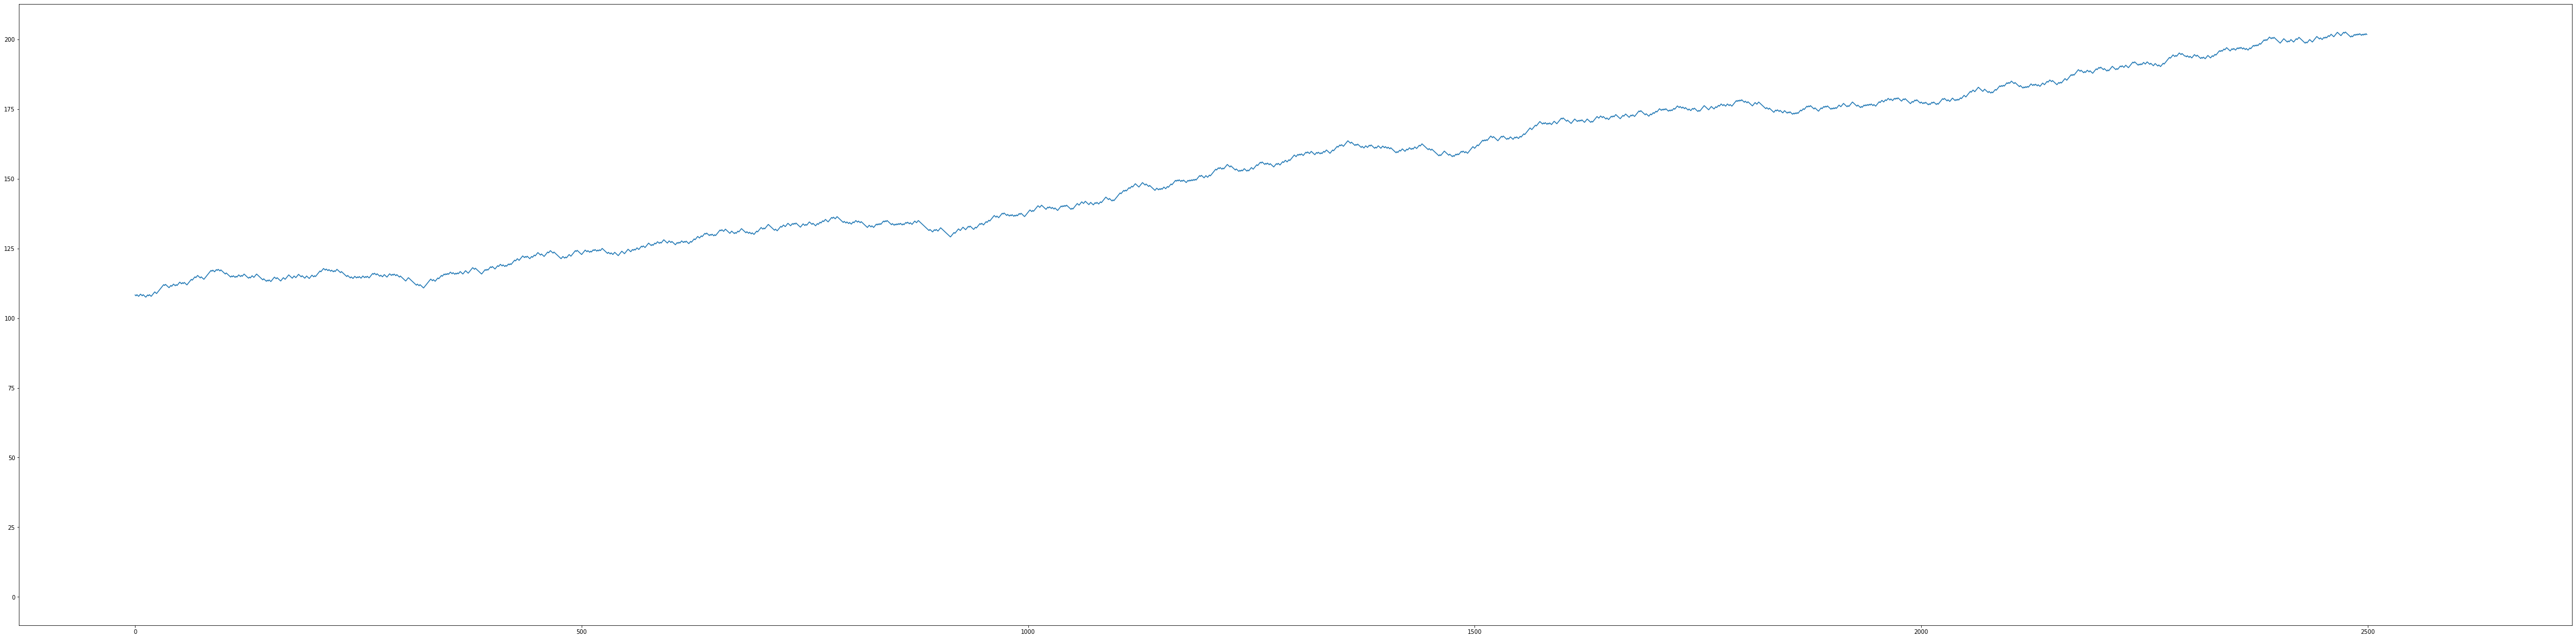

In [186]:
for group in config['Agent']['RLAgent']:
    group_name = group['name']
    group_number = group['number']
    sample_id = f"{group_name}_{group_number}_{random.randint(0, group_number-1)}"
    state = rl_states[sample_id]
    print(sample_id)
    holdings_df = pd.DataFrame(rl_states[sample_id]['states'])
    plt.plot(holdings_df.wealth / holdings_df.wealth[0], label = "wealth")
    plt.plot(holdings_df.TSMC / holdings_df.TSMC[0], label = "TSMC")
    plt.plot(holdings_df.cash / holdings_df.cash[0], label = "cash")
    plt.legend()
    plt.show()
    
    actions = rl_states[sample_id]['actions']
    actions_df = pd.DataFrame(rl_states[sample_id]['actions'], columns = ['action', 'tick', 'volume'])
    print(f"Bid rate: {actions_df.action.eq(0).mean()}, Ask rate: {actions_df.action.eq(1).mean()}, Hold rate: {actions_df.action.eq(2).mean()}")
    bid_x, bid_y = [], []
    ask_x, ask_y = [], []
    bid_sizes, ask_sizes = [], []
    bid_colors, ask_colors = [], []
    base_size = 200
    for timestep, action in enumerate(actions):
        if action[0] == 0:
            bid_x.append(timestep + 100)
            bid_y.append(action[1]*0.1)
            bid_colors.append('r')
            bid_sizes.append(base_size * action[2])
        elif action[0] == 1:
            ask_x.append(timestep + 100)
            ask_y.append(action[1]*0.1)
            ask_colors.append('g')
            ask_sizes.append(base_size * action[2])
            
    x = np.arange(2500)
    plt.figure(figsize=(80, 20))
    plt.plot(x, market['price'][100:])
    plt.scatter(bid_x, a, s = bid_sizes, c = bid_colors, marker = 6)
    plt.scatter(ask_x, ask_y, s = ask_sizes, c = ask_colors, marker = 7)
    plt.show()

        
    break

### Relation of reward and performance

In [91]:
agent_ids = list(rl_states.keys())
agent_id = random.sample(agent_ids, 1)
state = rl_states[agent_id]
rewards = state['rewards']


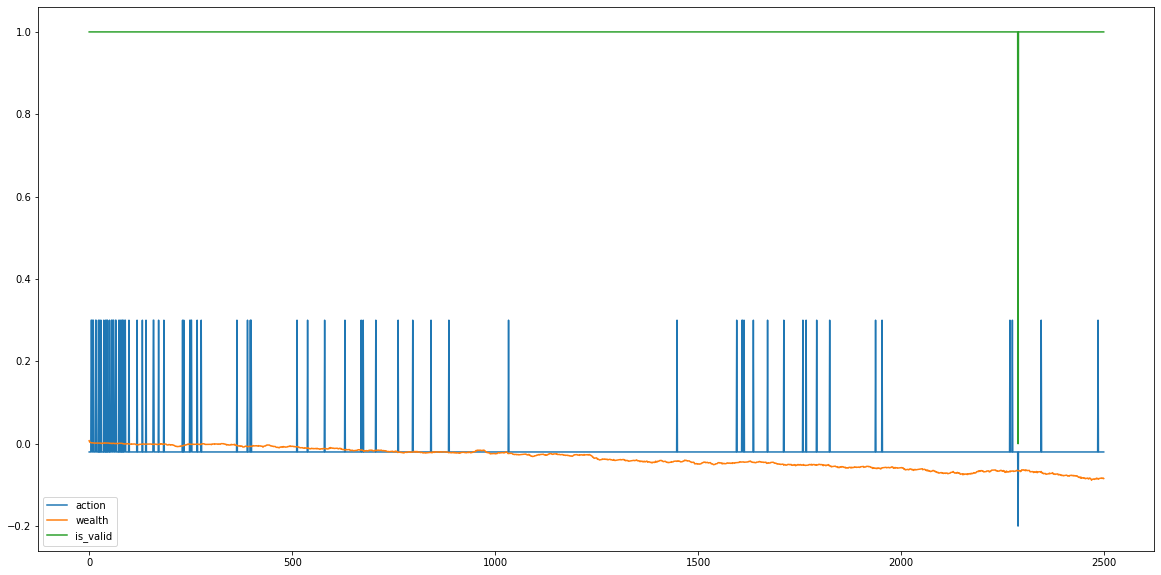

In [92]:
plt.plot(timesteps, rewards, label = ['action', 'wealth', 'is_valid'])
plt.legend()

In [104]:
sim_num = len(train_dirs)
length = len(market['price'][100:])
timesteps = [i for i in range(length)]
agent_ids = list(rl_states.keys())
agent_id = random.sample(agent_ids, 1)[0]

total_rewards = []
for i in range(sim_num):
    record_dir = result_dir / 'train' / f'sim_{i}'
#     security_path = record_dir / "TSMC.json"
#     agent_path = record_dir / "agent.json"
    rl_path = record_dir / 'rl_agent.json'
#     market = json.loads(security_path.read_text())
#     agents = json.loads(agent_path.read_text())
    rl_states = json.loads(rl_path.read_text())
    total_rewards.append(rl_states[agent_id]['rewards'])


In [154]:
action_rewards = []
wealth_rewards = []
valid_rewards = []

tr = np.array(total_rewards)
total_reward_by_type = tr.reshape([-1, 3])

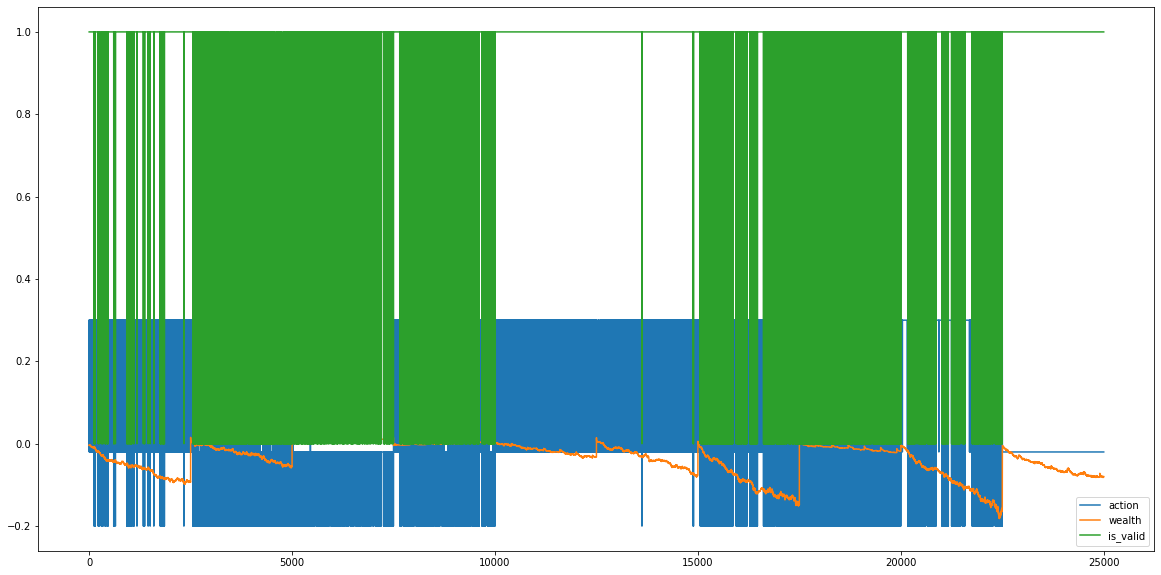

In [156]:
plt.plot(total_reward_by_type, label = ['action', 'wealth', 'is_valid'])
plt.legend()

### Orders

In [33]:
agents.keys()

dict_keys(['ppo_tr_100', 'ppo_va_100', 'ac_tr_100', 'ac_va_100'])

In [32]:
rl_states['ppo_tr_100_0']

{'states': [{'cash': 105999, 'TSMC': 12, 'wealth': 219518.99999999994},
  {'cash': 105999, 'TSMC': 12, 'wealth': 235478.99999999994},
  {'cash': 105999, 'TSMC': 12, 'wealth': 235959.0},
  {'cash': 106041.4, 'TSMC': 12, 'wealth': 235599.0},
  {'cash': 106083.81999999999, 'TSMC': 12, 'wealth': 236121.40000000002},
  {'cash': 106126.24999999999, 'TSMC': 12, 'wealth': 235803.81999999998},
  {'cash': 106168.69999999998, 'TSMC': 12, 'wealth': 235486.24999999997},
  {'cash': 106211.16999999998, 'TSMC': 12, 'wealth': 236008.7},
  {'cash': 106253.64999999998, 'TSMC': 12, 'wealth': 236531.16999999998},
  {'cash': 106296.14999999998, 'TSMC': 12, 'wealth': 236213.64999999997},
  {'cash': 106338.66999999998, 'TSMC': 12, 'wealth': 235896.14999999997},
  {'cash': 106381.20999999998, 'TSMC': 12, 'wealth': 236418.66999999998},
  {'cash': 106423.75999999998, 'TSMC': 12, 'wealth': 236101.20999999996},
  {'cash': 106466.32999999999, 'TSMC': 12, 'wealth': 235783.75999999995},
  {'cash': 106508.91999999998,

### Distribution of actions along times from random agent

In [26]:
prices = market['price'][100:]
bids = market['bid_five_price']
asks = market['ask_five_price']
bid_or_asks = []
agent_id = random.sample(agent_ids, 1)[0]
state = rl_states[agent_id]
counters = []
for agent_id, state in rl_states.items():
    bid_or_asks = []
    for i, action in enumerate(state['actions']):
        bid_or_ask = action[0]
        ticks = action[1]
        volume = action[2] + 1
        current_price = prices[i]
        tick_size = 0.1

        if bid_or_ask == 2:
            pass
        elif bid_or_ask == 0:
            # bid
            best_bids = list(bids[i])
            best_bid = current_price if len(best_bids) == 0 else float(best_bids[0])
            price = round(best_bid + (4-ticks) * tick_size, 2)

        elif bid_or_ask == 1:
            # ask
            best_asks = list(asks[i])
            best_ask = current_price if len(best_asks) == 0 else float(best_asks[0])
            price = round(best_ask + (ticks-4) * tick_size, 2)
        bid_or_asks.append(bid_or_ask)


    counter = {0: 0, 1: 0, 2: 0}
    for a in bid_or_asks:
        counter[a] += 1
    counters.append(counter)


In [81]:
hold_times = {i: 0 for i in range(length+1)}
bid_times = {i: 0 for i in range(length+1)}
ask_times = {i: 0 for i in range(length+1)}

for counter in counters:
    bid_times[counter[0]] += 1
    ask_times[counter[1]] += 1
    hold_times[counter[2]] += 1
    

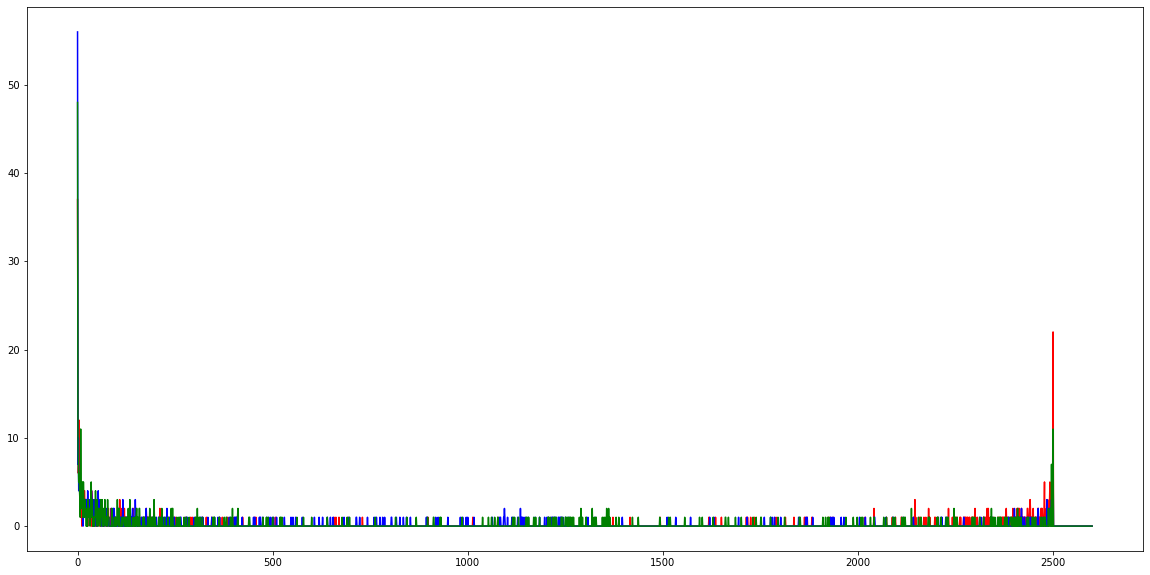

In [68]:
plt.plot(timesteps, list(hold_times.values()), 'r')
plt.plot(timesteps, list(bid_times.values()), 'b')
plt.plot(timesteps, list(ask_times.values()), 'g')

In [43]:
# append data for maintaining the same length
rl_states['states'][-1]['action'] = rl_states['states'][-2]['action']
rl_states['states'][-1]['reward'] = rl_states['states'][-2]['reward']

KeyError: 'states'

In [ ]:
rl_dict = {}
for k, v in rl_states['states'][0].items():
    if type(v) != dict:
        rl_dict[k] = []
    else:
        for key in v.keys():
            rl_dict[key] = []

In [ ]:
for state in rl_states['states']:
    for k, v in state.items():
        if type(v) != dict:
            rl_dict[k].append(v)
        else:
            for key, value in v.items():
                rl_dict[key].append(value)

In [ ]:
rl_df = pd.DataFrame(rl_dict)
rl_df

Reward

In [ ]:
plt.plot(rl_df.wealth / rl_df.wealth[0])
plt.plot(rl_df.wealth_reward)

Action

In [ ]:
'''
1. Discrete 3 - BUY[0], SELL[1], HOLD[2]
2. Discrete 9 - TICK_-4[0], TICK_-3[1], TICK_-2[2], TICK_-1[3], TICK_0[4], TICK_1[5], TICK_2[6], TICK_3[7], TICK_4[8]
3. Discrete 5 - VOLUME_1[0], VOLUME_2[1], VOLUME_3[2], VOLUME_4[3], VOLUME_5[4],
'''
valid_action_rate = rl_df.is_valid.mean()
bid_rate = rl_df.action.apply(lambda x: int(x[0]) == 0).mean()
ask_rate = rl_df.action.apply(lambda x: int(x[1]) == 0).mean()
hold_rate = rl_df.action.apply(lambda x: int(x[2]) == 0).mean()
print(f"Bid rate: {bid_rate}\nAsk rate: {ask_rate}\nHold rate: {hold_rate}\nValid action rate: {valid_action_rate}")

In [ ]:
rl_orders = rl_states['orders']

In [ ]:
bid_x, bid_y = [], []
ask_x, ask_y = [], []
bid_sizes, ask_sizes = [], []
bid_colors, ask_colors = [], []
base_size = 200
for order in rl_orders:
    if order['bid_or_ask'] == 'BID':
        if order['time'] > 5000 and order['time'] < 5100:
            bid_x.append(order['time'])
            bid_y.append(order['price'])
            bid_colors.append('r')
            bid_sizes.append(base_size * order['volume'])
    if order['bid_or_ask'] == 'ASK':
        if order['time'] > 5000 and order['time'] < 5100:
            ask_x.append(order['time'])
            ask_y.append(order['price'])
            ask_colors.append('g')  
            ask_sizes.append(base_size * order['volume'])

In [ ]:
x = np.arange(len(tsmc['close']))
plt.figure(figsize=(80, 20))
plt.plot(x[4999: 5101], tsmc['close'][4999:5101])
plt.scatter(bid_x, bid_y, s = bid_sizes, c = bid_colors, marker = 6)
plt.scatter(ask_x, ask_y, s = ask_sizes, c = ask_colors, marker = 7)
plt.show()